In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import operator
import os
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [2]:
text_list = read_text_folder("./datasample/")
print("document number:", len(text_list))

document number: 110


In [3]:
texts = os.listdir('./datasample')
#texts

In [4]:
corpus = []
for text in texts:
    with open('./datasample/{}'.format(text),'r',encoding = 'utf-8') as file:
        corpus.append(file.read())

In [5]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

add_word(['太平山頂','纜車','凌霄閣','杜莎夫人蠟像館','阿甘蝦餐廳','維多利亞港','幻彩詠香江','張寶仔號','星光大道','迪士尼樂園','燈光秀','海洋公園','廟街夜市','男人街','周星馳','食神','旺角女人街','波鞋街','金魚街','西洋菜南街','昂坪360','纜車','昂坪市集','天壇大佛','水晶車','大澳','大嶼山','蘭桂坊','中環半山扶手電梯','重慶森林','王菲','石板街','砵典乍街','色戒','十月圍城','無間道','龍鳳鬥','泰昌餅家','蘭芳園','絲襪奶茶','中環','嘉咸街壁畫','壁畫','甄子丹','劉德華','追龍','功夫','九龍城寨','塗鴉藝術','天際100','灣仔','金紫荊廣場','時代廣場','鵝頸橋','跑馬','地馬場','尖沙咀','1881 Heritage','1881Heritage','半島酒店','海港城','女人街','朗豪街','旺角','東湧','東薈城','怪獸大廈','春秧街市場','春秧街','鴨寮街','美荷樓','黃大仙祠','彩虹邨','大澳漁村','南丫島','赤柱市集','美利樓','鴨靈號','澳門','九龍','奶油豬仔包','花園街','流沙包','炭烤燒肉','太平山夜景','觀景台','阿甘蝦','豬扒包','生煎包','恆香老婆餅','大館','檀島咖啡','甘牌燒鵝','宜必思酒店','蓮香居','港幣','來回機票','電子港簽','台胞證','中環','銅鑼灣','新界','叮叮車','上環','金鐘','灣仔','天后','的士','八達通卡','油麻地','九龍尖沙咀','紅勘','李嘉欣','The One百貨','TheOne百貨','THEONE百貨','theone百貨','K11商場','龍城大藥房','翠華餐廳','至潮魚蛋','太子','雞仔餅','紅豆燒餅','奇趣餅家','冰火菠蘿油','金華冰廳','燒汁釀茄子','菠蘿油','鴨肉火肉飯','太平山','阿甘正傳','郭富城','阿甘蝦美式餐廳','沾仔記雲吞麵','海山樓','192層蛋塔','近郊','巧克力博物館','黃竹坑站','食神','禮頓道站','跑馬地總站','西港城','生記粥品','新記車仔麵','鵝頸橋打小人','沙田賽馬場','黃大仙','黃大仙廟','深水埗站','深水埗','天星小輪','天星碼頭','欣澳站','迪士尼','赤柱','西貢','地質公園','全記海鮮','松記車仔麵','長洲','張保仔號','張保仔洞','興樂菜館','新照記魚丸','超人氣','香港旅遊發展局','旅遊發展局','網路','熱搜','精選','分享文','選出','自由行','彙整','省錢','快速通關','住宿地','路線','風情','相當','龐大','一律','開始','插座','天王','寫','哈','車廂','包廂','TOP','Top','大量','排隊','詳細','香港','paula','CDATA','googleadclientcapub8969488696235010','33642280','googleadslot8177660368','googleadwidth336','googleadheight280CDATA','netsunlight0324CM199229823','googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250','套餐', '看起來','來的及'])

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/yj/b2sj8k396ts1dld08589ctwc0000gn/T/jieba.cache
Loading model cost 0.642 seconds.
Prefix dict has been built succesfully.


In [6]:
stopwords = ['竟然','完美','旅客','能力','來的及','成人','幾站','非吃不可','緊張','的','應該', '會','錯過','時間','根本','不曉得','就','都','選擇', '套餐', '看起來','...','多麼','甚至', '就是','而且', '一樣','當然','體驗','只是','.','特色','這裡','下車','走', '、','?','!',',','在','她','厲害','Commonroom','Day','day','DAY','全日','失敗','但','少','多','印象','近距離','除了','美食','台灣','市區','？', '唷','可以','很','！','，','。','的', '是', '在', '有', '就', '獲', '不' , '會', '若', '而', '這', '該', 'ETtoday', '被' , '那個' , '...' ,'klook','Klook','kkday','Kkday','大','便宜','票券','票價','門票','推薦','地圖','啊','吧','大概','好像','忘記','香港','文章','波比','那些','攻略','答案','這些','或許','要馬','了','啦','還有','哪裡','哪些','大概','或者','根據','都','整理','PDF','超人氣','哪','旅遊景點','景點','旅遊','發展','諸多','程度','排名','熱搜','一定','以及','亦','以','與','精選','分享文','選出','必去','必買','買','搶先','最','更','自由行','附上','所有','去','到','抵達','玩','出來','行程','比價','安排','大家','優惠','事項','搶','方便','這份','拿','一次','一起','趕緊','彙整','百萬','我們','省錢','快速通關','處','世界','住宿地','住宿','地','地方','於','活動','著','含','更新','懶人包','私房','也','超詳細','規劃','又','這也','用品','路線','碧海','非常','風情','相當','龐大','一律','開始','插座','天王','寫','哈','機票','大補帖','總','顯示','目前','幾次', '車', '電子港簽','正式', '怎樣','車廂','搞定', '窺','包廂','無','和','游','TOP','Top','大量','排隊','往','狠','一日','大多','短短','回顧','完善','之旅','幾家','路程','這樣','硬性','詳細','超','香港','paula','CDATA','googleadclientcapub8969488696235010','33642280','googleadslot8177660368','googleadwidth336','googleadheight280CDATA','netsunlight0324CM199229823','googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250','交通工具','大部分','預辦','收費','跟','說','網頁','血拼','機場','免費','確認','真的','人','上手'] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

In [7]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#sorted(list(doc_word_frequency[7].items()) , key = lambda x: x[1] , reverse=True)[0:20] # 顯示第一篇文章的部份詞彙與對應詞頻
#for i in range (len(text_list)):
   # l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
#print(l_d)

In [8]:
for i in range (len(text_list)):
    l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
print(l_d)


[('你', 75), ('我', 66), ('深水埗', 62), ('呢', 52), ('旅館', 45), ('Wontonmeen', 44), ('人', 42), ('這個', 40), ('一個', 31), ('話', 25), ('住', 25), ('說', 24), ('很多', 24), ('唐樓', 24), ('來', 23), ('為', 23), ('做', 21), ('知道', 20), ('自己', 20), ('阿金', 18), ('老', 18), ('沒', 18), ('麵', 17), ('他', 17), ('對', 17), ('因為', 17), ('這麼', 17), ('什麼', 17), ('之', 17), ('闆', 16), ('想', 16), ('一家', 16), ('一些', 16), ('籠屋', 15), ('設計', 15), ('上', 15), ('娘', 15), ('要', 14), ('後', 14), ('跟', 14), ('看', 14), ('真的', 14), ('這家', 13), ('Pat', 13), ('把', 13), ('吃', 13), ('^', 12), ('模型', 12), ('電影', 11), ('所以', 11), ('空間', 11), ('招牌', 11), ('細蓉', 10), ('咖啡', 10), ('不是', 10), ('看到', 10), ('照片', 10), ('這是', 10), ('他們', 10), ('讓', 10), ('狂', 10), ('旅', 10), ('好', 9), ('東西', 9), ('錢', 9), ('不會', 9), ('感覺', 9), ('社區', 9), ('雲', 8), ('吞', 8), ('經典', 8), ('音樂', 8), ('相信', 8), ('感受', 8), ('假如', 8), ('加上', 8), ('超級', 8), ('哈哈', 8), ('再', 8), ('愛', 8), ('這種', 8), ('房間', 8), ('間', 8), ('介紹', 7), ('故事', 7), ('分享', 7), ('一下', 7), ('如果', 

In [9]:
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [10]:
# 查詢斷完詞後的 list 
corpus_cut = [jieba.lcut(t) for t in corpus]
corpus_cut

[['當然',
  '，',
  '大部分',
  '來',
  '香港',
  '的',
  '朋友',
  '。',
  '女性',
  '多半',
  '來',
  '血拼',
  '的',
  '畢',
  '竟是',
  '免稅',
  '天堂',
  '，',
  '精品',
  '品牌',
  '的',
  '價位',
  '真的',
  '差滿',
  '多',
  '的',
  '男性',
  '，',
  '不是',
  '陪伴',
  '女友',
  '，',
  '就是',
  '來',
  '享受',
  '美食',
  '啦',
  '。',
  '這萬象',
  '之',
  '都',
  '的',
  '三天',
  '或是',
  '二天',
  '度假',
  '，',
  '都',
  '得',
  '好好',
  '運',
  '用到',
  '香港',
  '便利',
  '交通工具',
  '啊',
  '！',
  'CDATA',
  'googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250',
  'CDATA',
  '所以',
  '接下',
  '來介紹',
  '，',
  '最好',
  '的',
  '交通工具',
  '。',
  'CDATA',
  'googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250',
  'CDATA',
  '沒有',
  '錯',
  '，',
  '傳說',
  '中',
  '的',
  '十一',
  '路公車',
  '眾人圍',
  '毆',
  '。',
  '。',
  '。',

#文章數量要夠多才能用
#sorted_d = sorted(doc_word_frequency.items(), key=operator.itemgetter(1), reverse = True)

檢查字典
利用coshow

In [23]:
##a = [[1, 2], [3, 4]] 大概是這概念
cut = [i for sublist in corpus_cut for i in sublist]
new_dic = []
for i in range(len(cut) - 1):
    assemble_word = cut[i]+cut[i+1]
    new_dic.append(assemble_word)
    print(cut[i]+cut[i+1])
#    print(assemble_word)
#    #print(new_dic)

當然，
，大部分
大部分來
來香港
香港的
的朋友
朋友。
。女性
女性多半
多半來
來血拼
血拼的
的畢
畢竟是
竟是免稅
免稅天堂
天堂，
，精品
精品品牌
品牌的
的價位
價位真的
真的差滿
差滿多
多的
的男性
男性，
，不是
不是陪伴
陪伴女友
女友，
，就是
就是來
來享受
享受美食
美食啦
啦。
。這萬象
這萬象之
之都
都的
的三天
三天或是
或是二天
二天度假
度假，
，都
都得
得好好
好好運
運用到
用到香港
香港便利
便利交通工具
交通工具啊
啊！
！CDATA
CDATAgoogleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250
googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250CDATA
CDATA所以
所以接下
接下來介紹
來介紹，
，最好
最好的
的交通工具
交通工具。
。CDATA
CDATAgoogleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250
googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300google

去澳門
澳門玩要
玩要用
用那
那張
張這次
這次去
去香港
香港我
我是
是在
在KKday
KKday買
買了
了這張
這張網卡
網卡！
！香港
香港8
8天
天sim
sim卡
卡香港
香港本地
本地無限
無限通話
通話真心
真心推薦
推薦！
！最
最便宜
便宜最好
最好用
用，
，包裝
包裝還附
還附插針
插針和
和套
套卡
卡阿千用過
阿千用過真心
真心推薦
推薦！
！香港
香港上
上網電話
網電話卡
卡香港
香港8
8天
天sim
sim卡
卡香港
香港本地
本地無限
無限通話
通話香港
香港機場
機場取件
取件行李
行李拿
拿好
好出來
出來A14
A14櫃台
櫃台即可
即可換也
換也可以
可以在
在桃園
桃園機場
機場先取
先取卡
卡香港
香港上
上網電話
網電話卡
卡香港
香港8
8天
天sim
sim卡
卡香港
香港本地
本地無限
無限通話
通話桃園
桃園機場
機場取件
取件同時
同時要
要去
去香港
香港澳門
澳門的
的朋友
朋友最
最推
推這張
這張港澳
港澳上網
上網SIM卡
SIM卡香港
香港澳門
澳門7
7天網
天網卡桃園
卡桃園機場
機場取件
取件請
請自己
自己留意
留意香港
香港取
取或
或桃園
桃園取
取的
的營業
營業開始
開始及
及結束
結束時間
時間，
，避免
避免你
你的
的班機
班機配合
配合不上
不上！
！商品
商品頁面
頁面都
都有
有寫
寫，
，請
請自己
自己點進
點進去
去看
看麻煩
麻煩四
四香港
香港的
的插頭
插頭是
是那
那種頭
種頭？
？香港
香港的
的電壓
電壓是
是多少
多少？
？插頭
插頭是
是三個
三個扁扁的
扁扁的英規版
英規版，
，所以
所以台灣
台灣帶
帶去
去的
的插頭
插頭都
都不能
不能插
插，
，一定
一定要備
要備好
好萬用
萬用轉接頭
轉接頭！
！再來
再來百分之
百分之95
95的
的萬用
萬用轉接頭
轉接頭都
都沒
沒有
有支援
支援變壓
變壓功能
功能，
，單純
單純只是
只是幫
幫你
你轉換
轉換插座
插座！
！所以
所以一個
一個好
好用還
用還支援
支援多孔
多孔USB
USB以及
以及高速
高速充電
充電的
的萬用
萬用轉接頭
轉接頭很
很重要
重要！
！大
大至上
至上你
你的
的手機
手機行動
行動電源
電源相機
相機筆電
筆電都
都支援
支援國際
國際電

嗎？
？你
你可以
可以摸摸
摸摸自己
自己良心
良心想想
想想，
，還有
還有的
的講了
講了一個
一個我
我也
也不
不知道
知道鬼
鬼的
的飯
飯店名
店名，
，問我
問我交通
交通要
要怎
怎坐
坐！
！！
！你
你上
上GOOGLEMAP
GOOGLEMAP查
查他
他都
都會
會跟
跟你
你說
說，
，有
有這麼
這麼難
難嗎
嗎？
？這你出
這你出國應
國應做
做的
的功課
功課，
，我
我這裡
這裡不是
不是旅行社
旅行社也
也沒
沒賺
賺你
你費用
費用，
，為何
為何老
老是
是丟
丟這種
這種自己
自己的
的功課
功課要
要人家
人家回
回....
....莫名其妙
莫名其妙！
！火
火都
都上
上來
來了
了！
！以下
以下回歸
回歸正題
正題，
，也
也幫
幫你
你做
做總結
總結！
！你
你若
若嫌
嫌文章
文章太長
太長沒
沒看到
看到這裡
這裡，
，也
也不用
不用來問
來問我
我了
了KKday
KKday遊客
遊客版八達通
版八達通你
你只
只去
去12
12天
天香港
香港就
就買
買這張
這張或
或機場
機場買
買租借
租借八達通
八達通！
！自己
自己選查
選查即
即時
時價位
價位KKday
KKday快線
快線套票
套票3
3日地
日地鐵無限
鐵無限搭
搭你
你來
來3
3天
天以上
以上都
都應該
應該買
買這
這套票
套票，
，再配
再配下方
下方的
的機場
機場快線
快線單程查
單程查即
即時
時價位
價位KKday
KKday機場
機場快線
快線來
來12
12天
天的
的人
人機場
機場快線
快線來
來回八達
回八達通來
通來3
3天
天以上
以上的
的人
人單次
單次3
3日地
日地鐵買
鐵買單程
單程快線查
快線查即
即時
時價位
價位KKday
KKday全日
全日通只
通只來
來1
1天
天的
的人
人必買
必買自己
自己再加
再加機場
機場快線
快線來
來回
回兩天
兩天內
內很會
很會跑
跑的
的請
請買天
買天！
！查即
查即時價位
時價位總結
總結如果
如果你
你只是
只是來個
來個香港
香港12
12天
天！
！就
就不用
不用特地去
特地去買
買任何
任何八達通
八達通，
，用
用全日
全日通去當
通去當你
你的
的交通卡
交通卡當天
當天無
無限次
限次坐
坐，
，而
而你
你兩天
兩天都

為港幣
港幣2.3
2.3元
元。
。比起
比起地鐵
地鐵更
更適合
適合深入
深入鬧區
鬧區，
，妥善
妥善利用
利用的
的話
話可以
可以少
少走
走很多
很多路
路。
。4
4.
.計程車
計程車一般
一般旅客
旅客以紅色
以紅色的
的市區
市區計程車
計程車為
為主
主，
，市區
市區收費
收費較
較台北
台北高
高一些
一些，
，前
前2
2公里
公里港幣
港幣24
24元
元，
，後
後面
面每
每200
200公尺
公尺1.7
1.7元
元，
，如
如有
有行李
行李或
或需收費
需收費隧道
隧道則
則另外
另外收費
收費收費表
收費表。
。5
5.
.巴士
巴士價格
價格依
依路程
路程長
長短
短不同
不同，
，可用
可用八達通
八達通或
或零錢
零錢。
。除了
除了機場
機場往返
往返市區
市區外
外，
，前往
前往太平山
太平山海洋公園
海洋公園赤柱
赤柱大澳
大澳是
是一些
一些較
較常用
常用到
到的
的路線
路線可以
可以搭配
搭配香港
香港乘車
乘車易來
易來查詢
查詢該
該坐
坐幾號
幾號巴士
巴士。
。No.9
No.9香港
香港自由行
自由行行程表
行程表，
，附
附PDF
PDF檔
檔香港
香港隨時
隨時都
都可以
可以出發
出發，
，一般
一般旅客
旅客大多
大多會
會安排
安排34
34天
天，
，因此
因此波比
波比特地
特地列
列了
了兩條
兩條4
4天
天3
3夜
夜行程
行程，
，一條
一條主要
主要品嘗道
品嘗道地
地美食
美食與
與伴手
伴手禮吃貨
禮吃貨路線
路線一條則
一條則是
是以樂園
以樂園與
與血
血拚
拚為
為主親子
主親子路線
路線給
給大家
大家參考
參考。
。如果
如果喜歡
喜歡我
我的
的香港
香港行程
行程，
，只要
只要加入
加入Line
Line輸入
輸入關鍵
關鍵字
字香港
香港行程
行程攻略
攻略後
後，
，行程
行程PDF
PDF檔
檔就
就會
會秒
秒速寄
速寄給你們
給你們！
！路線
路線一
一香港
香港道
道地
地美食
美食之旅
之旅Day1
Day1灣仔
灣仔美食
美食超市
超市血
血拚
拚搭
搭機國泰飛
機國泰飛香港
香港機票
機票比價
比價交通
交通機場
機場快線
快線往
往市區
市區快速
快速又
又方便
方便美食
美食甘牌燒鵝
甘牌燒鵝米其林
米其林一星
一星推薦
推

建廟的
的用心
用心，
，不論
不論有
有無
無信仰
信仰，
，到
到這裡
這裡來
來參觀
參觀建築
建築，
，感受
感受莊嚴
莊嚴清淨
清淨的
的氣氛
氣氛也
也不錯
不錯，
，而且
而且還不會
還不會燻
燻的
的一身
一身灰
灰呢
呢！
！貓大爺
貓大爺香港
香港旅遊及
旅遊及美食
美食大
大集合
集合貓大爺
貓大爺香港
香港米其林
米其林餐廳
餐廳懶人
懶人包貓
包貓大爺
大爺澳門
澳門旅遊及
旅遊及美食
美食大
大集合
集合貓大爺
貓大爺澳門
澳門米其林
米其林餐廳
餐廳懶人包
懶人包adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push貓大爺
貓大爺粉絲團
粉絲團香港
香港旅遊景點
旅遊景點有
有哪些
哪些？
？香港
香港去
去哪
哪玩
玩？
？40
40大
大香港
香港景點
景點推薦
推薦香港
香港景點
景點地圖
地圖攻略
攻略有
有答案
答案！
！這些
這些超人氣
超人氣香港
香港必去
必去景點
景點，
，是
是波比
波比根據
根據香港旅遊發展局
香港旅遊發展局景點
景點排名
排名網路
網路熱搜
熱搜程度
程度以及
以及諸多
諸多香港
香港自由行
自由行分享文
分享文，
，精選
精選出來
出來的
的超人氣
超人氣景點
景點。
。所有
所有的
的香港
香港景點
景點都
都會
會附上
附上香港
香港地鐵資訊
地鐵資訊香港
香港地圖
地圖優惠
優惠票券
票券，
，方便
方便大家
大家安排
安排香港
香港旅遊
旅遊行程
行程，
，比價
比價搶
搶便宜
便宜門票
門票。
。趕緊
趕緊拿
拿著
著這份
這份香港
香港旅遊
旅遊地圖
地圖大
大彙整
彙整含
含香港
香港私房
私房景點
景點，
，一起
一起玩
玩瘋制
瘋制霸
霸香港
香港吧
吧。
。2019
2019更新
更新香港
香港住宿
住宿懶人包
懶人包香港
香港超熱門
超熱門Top
Top15
15住宿
住宿總
總整理
整理！
！香港
香港超
超詳細
詳細攻略
攻略行程
行程自由行
自由行規劃
規劃大補帖
大補帖機票
機票最
最便宜
便宜機票
機票5000
5000元有
元有找景點
找景點精選
精選10
10大遊客
大遊客必去
必去景點
景點必買
必買28
28項超
項超夯伴
夯伴手禮
手禮大公
大公開
開美食
美食5

我們都
都覺得
覺得巴士
巴士應該
應該是
是每
每站
站都
都停
停結果
結果快
快到
到半山
半山手扶
手扶電梯
電梯時
時看到
看到車沒有
車沒有要
要停
停的
的跡象
跡象才
才緊急
緊急找
找了
了下
下車鈴
車鈴，
，好
好在
在中環
中環那
那小小
小小塞車
塞車，
，車沒有
車沒有開
開很快
很快按鈴後司
按鈴後司機還
機還是
是找
找了
了個
個地方
地方讓
讓我們
我們下車
下車了
了結論
結論是
是...
...真的
真的要
要按鈴車
按鈴車才
才會
會停
停！
！！
！哈哈
哈哈！
！筆記
筆記香港
香港給我
給我的
的第一印象
第一印象十萬
十萬火急
火急，
，衝衝衝
衝衝衝。
。香港
香港急
急的
的程度
程度比
比台北
台北猛
猛，
，行人
行人走路
走路很
很急
急，
，店家
店家待客
待客很
很急
急，
，路上
路上喇叭
喇叭按得
按得急
急，
，小小的
小小的城市
城市裡
裡，
，每個
每個人
人好像
好像都
都很
很忙碌
忙碌，
，大家
大家不
不知道
知道忙
忙著
著去
去哪
哪？
？邁開
邁開的
的步伐
步伐裡
裡，
，流瀉
流瀉出
出城市
城市人常見
人常見的
的冷漠
冷漠。
。但
但我
我想
想他們
他們不是
不是真的
真的冷漠
冷漠，
，只是
只是忙
忙了點
了點，
，就
就像
像我常
我常在
在台北
台北趕路
趕路，
，東奔西
東奔西跑
跑那樣
那樣更
更多
多案例
案例請點
請點1
1.
.吃
吃飯
飯好比
好比上戰場
上戰場人
人擠
擠人蓮香樓
人蓮香樓2
2.
.澳洲
澳洲牛奶
牛奶公司
公司牛油
牛油方包
方包和
和西
西煎
煎雙蛋
雙蛋，
，好吃
好吃耶
耶印象
印象二
二麻雀
麻雀雖小
雖小，
，五臟
五臟俱全
俱全。
。香港
香港面積
面積小飯店
小飯店房間
房間小遊樂園
小遊樂園小
小，
，什麼
什麼都
都小
小，
，但
但什麼
什麼都
都有
有。
。交通
交通，
，有港
有港鐵
鐵叮叮車
叮叮車巴士
巴士的士
的士和
和纜車
纜車。
。飲食
飲食，
，有
有米其林
米其林餐廳
餐廳傳統
傳統老式
老式茶樓
茶樓夜夜
夜夜笙歌
笙歌蘭桂坊
蘭桂坊。
。玩樂
玩樂，
，迪士尼樂園
迪士尼樂園世界
世界級
級太平山夜景
太平山夜景，
，奢華高級
奢華高級精品
精品。
。吃喝
吃喝玩樂樣樣
玩樂樣樣俱全
俱

牛腩汁
汁麻辣
麻辣醬
醬等
等選擇
選擇。
。車仔
車仔麵
麵的
的神髓
神髓，
，在
在於
於配料
配料食材
食材都
都是
是廉價品
廉價品，
，單獨
單獨吃
吃無
無啥
啥看頭
看頭，
，但
但各種
各種配料
配料湯汁
湯汁麵
麵條搭
條搭在
在一起
一起，
，卻會產生
卻會產生琴瑟
琴瑟和鳴
和鳴的
的好
好滋味
滋味。
。經營
經營了
了40
40年
年的
的榮記粉
榮記粉麵
麵，
，就是
就是如此
如此一間
一間店子
店子裝潢
裝潢簡單
簡單，
，服務並
服務並非無微
非無微不
不至
至，
，只有
只有23
23款傳
款傳統車
統車仔
仔麵
麵選擇
選擇，
，各
各方面
方面的
的條件
條件都
都不算
不算突出
突出，
，但
但拼
拼湊
湊起來
起來就是
就是一份
一份無可
無可取代
取代的
的韻味
韻味。
。在
在這
這裏
裏吃
吃一碗
一碗車仔
車仔麵
麵，
，不是
不是在
在吃種
吃種精
精緻
緻美食
美食，
，而是
而是吃種
吃種令
令味蕾
味蕾百味
百味雜陳
雜陳但味味
但味味俱
俱到位
到位的
的複
複雜
雜美味
美味，
，有
有一點點
一點點像
像我們
我們臺
臺灣人
灣人的
的菜
菜尾
尾菜
菜，
，或是
或是潮州人
潮州人的
的盆頭
盆頭菜
菜，
，雖然
雖然滋味
滋味不
不全然
全然相同
相同，
，但
但都
都有
有一個
一個共同
共同點
點物美
物美價廉
價廉。
。...
...各位
各位台灣
台灣同胞
同胞若要
若要來榮
來榮記粉
記粉麵
麵一
一嚐
嚐香港
香港人氣車
人氣車仔
仔麵
麵，
，最好
最好先
先研讀
研讀一下
一下上面
上面的
的菜牌
菜牌榮記
榮記生意
生意很
很好
好，
，用餐
用餐時間
時間百頭
百頭鑽動
鑽動，
，若
若是
是你
你把
把服務生
服務生叫
叫來
來旁邊
旁邊，
，然後看
然後看著菜
著菜牌支
牌支支晤晤
支晤晤地
地講不出
講不出你
你要
要吃
吃啥
啥，
，或是
或是問東
問東問西
問西，
，那
那他們
他們是
是真的
真的沒有
沒有時間
時間來
來服務
服務你
你。
。第二
第二個
個重要
重要的
的事
事就是
就是最好
最好選在
選在早上
早上1130
1130它
它一開門
一開門就
就來
來吃
吃，
，此時
此時人
人最少
最少。
。榮記
榮記每天
每天中午
中午1200
1200起

沒有
有騙
騙人
人，
，真的
真的是
是雙人床
雙人床沒
沒有
有錯
錯...
...由
由於
於這
這仲介
仲介是
是YAMA
YAMA公司
公司專屬
專屬的
的合作
合作仲介
仲介，
，所以
所以她
她已
已經帶
經帶太
太多台
多台灣人
灣人去
去買
買過床
過床墊
墊了
了，
，她
她很大
很大聲
聲的
的附和
附和真的
真的沒錯
沒錯啦
啦，
，你們
你們台灣
台灣的
的單人床
單人床真的
真的就是
就是香港
香港的
的雙人床
雙人床啦
啦...
...YAMA
YAMA還叫
還叫我
我趕快
趕快拍照
拍照起來
起來，
，我還
我還真的
真的拍
拍了
了，
，但
但香港
香港人
人沒生氣
沒生氣，
，大家
大家笑成
笑成一團
一團，
，因為
因為他們
他們說
說你
你們
們台灣
台灣人
人每次
每次的
的反應
反應都
都一樣
一樣的
的下
下圖
圖我
我房內
房內的
的浴室
浴室，
，是
是拉門式
拉門式的
的浴缸
浴缸在
在左方
左方木門
木門的
的後
後面
面，
，照不到
照不到下圖
下圖房間
房間已經
已經那麼
那麼小
小了
了，
，還要
還要搞
搞個
個浴室
浴室，
，要是
要是我
我，
，一定
一定把
把浴室
浴室打
打掉
掉，
，拓展
拓展房間
房間的
的空間
空間下圖
下圖YAMA
YAMA的
的浴室
浴室是
是淋浴
淋浴的
的，
，從
從照片
照片看不出
看不出來
來，
，可實際
可實際上
上淋浴
淋浴間小到
間小到一個
一個誇張
誇張的
的境界
境界，
，在
在裡面
裡面洗澡
洗澡一定
一定會
會磕磕碰碰
磕磕碰碰，
，所以
所以YAMA
YAMA每次
每次洗澡
洗澡，
，我
我都
都會
會聽
聽見
見咚咚
咚咚咚
咚的
的聲音
聲音看
看地磚
地磚大概
大概就
就可
可知道
知道了
了，
，大概
大概只有
只有二塊
二塊多
多一點點
一點點完整
完整地磚
地磚的
的空間
空間，
，外國大
外國大胖子
胖子肯定
肯定擠
擠不
不進去
進去下圖
下圖迷你
迷你小
小廚房
廚房，
，只能
只能塞進
塞進一個
一個人
人，
，每次
每次YAMA
YAMA要
要進來
進來，
，我
我就
就必須
必須先
先出去
出去下圖
下圖廚具
廚具讓
讓我
我覺得
覺得好
好親切
親切啊
啊，
，和
和我們
我們台灣家
台灣家所
所使用
使用的
的顏色
顏色

，機場
機場竟然
竟然這樣
這樣的
的不
不科技
科技只
只在
在checkin
checkin櫃台
櫃台以
以這樣
這樣的
的手
手寫
寫方式
方式公告
公告電子
電子看板
看板也
也沒
沒有
有修改
修改開櫃
開櫃跟
跟關櫃
關櫃的
的時間
時間也
也沒
沒有
有顯示
顯示不同
不同顏色
顏色以識別
以識別...
...讓
讓排隊
排隊在
在天邊
天邊的
的我們
我們根本
根本不曉得
不曉得...
...還超級
還超級緊張
緊張的
的...
...想
想說
說應該
應該會
會錯過
錯過時間
時間...
...跑
跑去
去詢問
詢問台問
台問也
也只
只說
說會
會來的及
來的及，
，也
也沒
沒有
有告知
告知因為
因為班機
班機已底
已底累
累...
...是
是啥
啥鬼
鬼阿多
阿多說
說幾個
幾個字會
字會怎樣
怎樣嗎
嗎然後是
然後是有
有提供
提供誤餐費
誤餐費啦
啦但是
但是本來
本來應該
應該是
是悠閒
悠閒的
的旅行
旅行變得
變得有點
有點緊張
緊張...
...所以
所以我們
我們在
在checkin
checkin大廳
大廳就
就待
待了
了好久
好久的
的時間
時間，
，又
又不敢
不敢去
去亂
亂晃
晃...
...就
就只
只逛
逛了
了這個
這個很
很可愛的
可愛的kittycheckincounter
kittycheckincounter然後就入
然後就入關去
關去用餐
用餐囉
囉paula
paula吃不下
吃不下，
，但是
但是甜點
甜點飲料
飲料可以
可以既然
既然不用
不用花
花自己
自己的
的錢
錢當然
當然就是
就是要來
要來杯
杯GODIVA
GODIVA這樣
這樣是
是一個
一個套餐
套餐，
，好像
好像還要
還要多付
多付50
50元
元吧
吧時間
時間有點
有點久
久了
了...
...忘
忘了
了閨蜜們
閨蜜們就
就都
都選擇
選擇套餐
套餐看起來
看起來也
也滿
滿美味
美味的
的印象
印象中
中這個
這個起飛
起飛時間
時間好像
好像還有
還有再
再晚半個
晚半個小時
小時天公
天公伯
伯阿
阿這時間
這時間我
我應該
應該已經
已經在
在香港
香港了
了阿
阿我
我不依
不依啦終
啦終於
於等到
等到要
要登機
登機了
了很快
很快的
的我們
我們就
就抵達
抵達了
了香港
香港赤臘角
赤臘角機場
機

香港，
，跨一個
跨一個不
不一樣
一樣的
的年
年來
來到
到香港
香港除了
除了吃
吃港式
港式美食
美食小吃
小吃外
外，
，最最
最最最
最重要
重要的
的就是
就是看
看香港
香港島的
島的夜景
夜景是
是的
的我們
我們往
往死裡
死裡送
送，
，元旦
元旦這天
這天到
到觀光區
觀光區去
去跨
跨年
年，
，已經
已經準備
準備好
好被
被夾成
夾成蛋餅
蛋餅了
了香港
香港的
的夜景
夜景世界
世界聞名
聞名，
，妃
妃醬
醬來
來了
了兩次
兩次香港
香港兩次
兩次都
都上
上太平山
太平山，
，跟
跟不同
不同的
的人
人看
看夜景
夜景有
有不同
不同的
的感覺
感覺但
但這兩次
這兩次最大
最大的
的不同
不同就是
就是上
上山花
山花的
的時間
時間出國
出國旅遊
旅遊時間
時間非常
非常寶貴
寶貴，
，花點
花點小錢省
小錢省時間
時間是
是非常
非常值得
值得的
的，
，更
更何況
何況也
也沒
沒有
有很
很貴
貴XD
XD第一次
第一次去
去香港
香港時機票
時機票和
和酒店
酒店是給
是給旅行社
旅行社辦
辦的
的，
，整個
整個辦下
辦下來裡面
來裡面就
就有
有贈
贈送
送一張
一張太平山
太平山的
的搭乘
搭乘票
票這張
這張是
是普通
普通的
的乘車票
乘車票，
，不是
不是快速通關
快速通關的
的當時
當時是
是暑假
暑假去
去的
的，
，真的
真的又
又餓
餓又
又熱又累
熱又累，
，排
排到
到非常
非常煩躁
煩躁搭乘
搭乘的
的那天
那天我們
我們就
就跟
跟著
著一般
一般排隊
排隊的
的人潮
人潮排
排了
了兩個
兩個多小時
多小時才
才排到
排到纜車
纜車.
.你
你看看
看看有多美
有多美排隊
排隊的
的疲累
疲累一到
一到凌霄閣
凌霄閣看到
看到夜景
夜景就
就煙
煙消雲散
消雲散了
了第二次
第二次的
的香港
香港遊我
遊我還是
還是很
很想
想去
去太平山
太平山看
看夜景
夜景，
，這是
這是路易斯
路易斯第一次
第一次出國
出國，
，也
也是
是我們
我們倆
倆一起
一起看
看的
的第一
第一個
個夜景
夜景怎麼
怎麼有點
有點感慨
感慨但
但.
.雖然
雖然夜景
夜景真的
真的很
很美
美，
，我
我真的
真的不想
不想排兩個
排兩個小時
小時的
的隊
隊.
.真的
真的很浪費
很浪費時間
時間

了！
！忽然
忽然有
有一種
一種歷史
歷史感
感呀
呀看到
看到扶手
扶手也
也綁
綁了
了這些
這些編
編製
製品
品，
，不
不知道
知道代表
代表甚麼
甚麼意義
意義？
？不過
不過說
說真的
真的，
，石板街
石板街砵
砵甸
甸乍
乍街
街就
就小小
小小一條
一條，
，十分
十分鐘
鐘，
，很快
很快！
！不過
不過我們
我們依然
依然可以
可以拍來
拍來，
，看鏡頭
看鏡頭囉
囉接下
接下來
來要
要去
去山頂
山頂纜車
纜車嘛
嘛，
，因為
因為剛好
剛好有些
有些景點
景點都
都會
會經過
經過，
，所以
所以我們
我們也
也就
就稍微
稍微有
有走
走一下
一下路不過
路不過此時
此時也
也可以
可以好好
好好欣賞
欣賞香港
香港的
的城市
城市風情
風情呢
呢！
！不然
不然很多
很多人
人都
都只是
只是為
為了
了到
到某景點
某景點而
而匆匆
匆匆趕路
趕路，
，這
這不是
不是浪費
浪費了
了旅行
旅行嗎
嗎？
？連
連老外
老外都
都這麼
這麼悠哉
悠哉地
地在
在喝
喝下午
下午咖啡
咖啡了
了，
，我們
我們是不是
是不是該
該放慢
放慢腳步
腳步了
了呢
呢？
？CircleK
CircleK就是
就是我
我所
所說
說的
的，
，它
它是
是OK
OK便利商店
便利商店！
！！
！這
這城市
城市充滿
充滿著名
著名車
車BMWBenzAudiFerrari
BMWBenzAudiFerrari等等
等等的
的名車
名車，
，不
不知道
知道生活
生活在
在香港
香港的
的庶民
庶民會
會是
是甚麼
甚麼感受
感受？
？我
我一直
一直對
對於
於這雙層
這雙層巴士
巴士很
很有
有奇妙
奇妙的
的感覺
感覺，
，為
為什麼
什麼香港
香港會發
會發展出
展出雙層
雙層巴士
巴士？
？怎麼
怎麼台灣
台灣就
就沒
沒有
有這種
這種公車勒
公車勒網路
網路上介紹
上介紹的
的TOP
TOPSHOP
SHOP價位
價位是
是在
在HM
HM跟
跟ZARA
ZARA之間
之間，
，但
但為
為什麼
什麼我們
我們那天
那天去
去看
看幾乎
幾乎都
都在
在台幣
台幣兩千
兩千以上
以上？
？走著
走著走
走著
著我們
我們走
走到
到了
了中環
中環中心
中心囉
囉這
這中環
中環中心站
中心站在
在底下
底下往上
往上看
看還真

古董街
街石板
石板街景
街景點走
點走透透
透透銅鑼灣
銅鑼灣走
走一趟
一趟鬧區
鬧區精華段
精華段時代廣場
時代廣場Forever21HM
Forever21HM都
都不放過
不放過搭山頂
搭山頂纜車
纜車到
到太平山
太平山深入
深入杜莎夫人蠟像館
杜莎夫人蠟像館美食
美食購物
購物介紹
介紹好吃
好吃美食
美食大
大蒐
蒐羅
羅推薦
推薦10
10種
種港式
港式經典
經典港式
港式飲茶趣
飲茶趣稻香
稻香超級
超級漁港
漁港大酒
大酒樓點心
樓點心吃
吃不停
不停餐廳
餐廳飲
飲食文化
食文化篇
篇吃
吃美食
美食不
不忘
忘注意
注意10
10個
個入境
入境隨俗
隨俗茶
茶餐廳
餐廳文化
文化澳門
澳門茶餐
茶餐廳
廳金華冰廳
金華冰廳破解
破解各種
各種餐點
餐點的
的特殊
特殊用詞
用詞推薦
推薦香港
香港8
8大伴
大伴手禮
手禮紀念品
紀念品選上
選上幾樣
幾樣放入
放入購物
購物清單
清單住宿
住宿選擇
選擇九龍
九龍佐敦站
佐敦站恆豐
恆豐酒店
酒店附機場
附機場快線
快線與
與接駁
接駁巴士
巴士前往
前往九龍
九龍市區
市區九龍
九龍佐敦
佐敦地鐵站
地鐵站附近
附近飯店
飯店整理
整理九龍尖沙咀
九龍尖沙咀地鐵站
地鐵站附近
附近飯店
飯店整理
整理九龍
九龍旺角
旺角地鐵站
地鐵站附近
附近飯店
飯店整理
整理香港
香港中環
中環地鐵站
地鐵站附近
附近飯店
飯店整理
整理香港
香港銅鑼灣
銅鑼灣地鐵站
地鐵站附近
附近飯店
飯店整理
整理交通
交通資訊
資訊叮叮車
叮叮車電車
電車怎麼
怎麼搭乘
搭乘7
7大重點
大重點整理
整理搭乘
搭乘地鐵捷
地鐵捷運教學篇
運教學篇簡單
簡單5
5大重點
大重點香港
香港國際
國際機場
機場上
上手篇
手篇。
。出入境
出入境港
港簽手
簽手機網
機網卡機場
卡機場快線
快線接駁
接駁巴士
巴士台
台中
中清泉
清泉崗國際
崗國際機場
機場介紹
介紹。
。搭乘
搭乘華信
華信航空
航空香港
香港自由行
自由行之旅
之旅優惠門票
優惠門票與
與行程
行程推薦
推薦以下
以下為
為網路
網路平台
平台KKDAY
KKDAY的
的優惠
優惠活動
活動或門票
或門票PJ
PJ發現
發現大都
大都比
比旅行社
旅行社代訂
代訂來
來的
的划算
划算一些
一些若覺
若覺得
得價格
價格實惠
實惠，
，

的拍打
拍打著
著玻璃
玻璃車窗
車窗，
，過彎
過彎的
的甩尾
甩尾唷
唷從車
從車窗外
窗外看
看下去
下去，
，一覽
一覽無
無遺
遺的
的山坡
山坡邊
邊，
，甩
甩到
到一度
一度覺得
覺得這台
這台巴士
巴士會不會
會不會翻過
翻過去
去阿有
阿有驚無險
驚無險地
地返回
返回中環
中環站
站，
，該
該說
說這些
這些司機
司機的
的技術
技術真
真好
好啊
啊中環
中環站翠華
站翠華餐館
餐館晚餐
晚餐泰昌餅家
泰昌餅家半山
半山自動
自動扶梯
扶梯砵
砵甸
甸乍
乍街
街假日
假日，
，聚集
聚集的
的人潮
人潮好多
好多，
，很多
很多都
都是
是東南亞
東南亞外籍人士
外籍人士，
，而且
而且很
很像
像路邊
路邊聚會
聚會一樣
一樣，
，還有
還有路邊
路邊攤
攤，
，垃圾
垃圾遍地
遍地香港
香港之旅
之旅，
，讓
讓我
我印象
印象深刻
深刻是
是廁所公廁
廁所公廁不好
不好找
找，
，大多
大多不外借
不外借廁所
廁所，
，部分
部分餐廳
餐廳的
的廁所
廁所不見
不見得
得是
是開放
開放，
，有時
有時你
你還得
還得找
找服務員
服務員拿
拿鑰匙
鑰匙幫
幫你
你開門
開門才能
才能使用
使用而
而在
在中環
中環的
的購物
購物商場
商場也
也是
是，
，為
為了
了找
找廁所花
廁所花了
了30
30分鐘
分鐘，
，還好
還好遇到
遇到好心
好心的
的店員
店員，
，拿
拿鑰匙
鑰匙幫開
幫開廁所
廁所使用
使用，
，其實
其實上
上不
不上
上廁所
廁所，
，大人
大人可以
可以控制
控制，
，但
但對
對於
於小孩
小孩是
是蠻
蠻不
不方便
方便，
，尤其
尤其是
是4
4歲
歲的
的大
大寶
寶，
，隨時
隨時隨地
隨地都問
都問她
她，
，問了
問了一整天
一整天都
都不
不尿
尿，
，最後在
最後在回家
回家時地
時地鐵站
鐵站說
說想
想尿
尿尿
尿找
找不到
不到地鐵站
地鐵站的
的廁所
廁所，
，只好
只好一路
一路奔回
奔回旅館
旅館上
上廁所
廁所穿梭
穿梭在
在城市
城市裡的
裡的叮叮車
叮叮車，
，車
車身上
身上醒目
醒目的
的各色
各色廣告
廣告，
，讓
讓叮叮車
叮叮車宛如
宛如大型
大型移動
移動看板
看板，
，這
這一面
一面化妝品
化妝品廣告剛
廣告剛走
走，
，下
下一面
一面銀行
銀行

是超級
超級划算
划算的
的網路
網路也
也不會斷
不會斷斷續續
斷續續準備
準備下
下飛機
飛機時
時，
，長
長榮
榮的
的空姐
空姐看到
看到路易斯
路易斯就
就說
說趙
趙先生
先生真的
真的很
很抱歉
抱歉，
，謝謝
謝謝您
您的
的搭乘
搭乘趙
趙先生
先生祝您
祝您旅途愉快
旅途愉快趙
趙先生
先生感謝
感謝您
您的
的搭乘
搭乘，
，服務
服務不周
不周請
請多
多包涵
包涵趙
趙先生
先生很爽
很爽吼
吼不
不知道
知道的
的人
人還以
還以為
為你
你是
是超級
超級VIP
VIP咧
咧....
....還是
還是免稅
免稅商品
商品買
買超多
超多..
..雖然
雖然只是
只是一個
一個送
送錯餐
錯餐的
的小
小事情
事情，
，但
但他們
他們都
都有
有放在心上
放在心上真的
真的很
很感動
感動飛機
飛機上
上雖然
雖然沒有
沒有螢幕
螢幕等
等娛樂
娛樂，
，但
但整趟
整趟旅程
旅程下來
下來走
走一個
一個舒
舒適風
適風也
也是
是不錯
不錯可能
可能也
也是
是因為
因為台灣
台灣到
到香港
香港很近
很近，
，所以
所以沒有
沒有太
太強烈
強烈的
的感覺
感覺不過
不過還是
還是很大
很大推長
推長榮
榮的
的服務品
服務品質小叮嚀
質小叮嚀準備
準備入境
入境時要
時要準備
準備好
好入境
入境單會
單會在
在飛機
飛機上
上請
請大家
大家填寫
填寫港
港簽護照
簽護照準備
準備好
好這些給
這些給入境
入境人員
人員看
看就
就可以
可以入境
入境了
了唷
唷記得
記得要
要保管
保管好港簽
好港簽和
和入境
入境單
單，
，這
這出境
出境離港
離港時
時都
都還要
還要再
再拿出
拿出來海關
來海關看
看唷
唷讓
讓我們
我們快速
快速地來
地來到
到回程
回程是
是的
的我們
我們買
買的
的並沒有
並沒有很多
很多蝦
蝦回程
回程一樣
一樣坐長
坐長榮
榮航空
航空，
，因為
因為怕
怕趕不上
趕不上飛機
飛機我們
我們提早
提早抵達
抵達香港
香港機場
機場從
從吃
吃完
完根本
根本不太
不太好吃
好吃的
的翠華
翠華後
後我們
我們就
就沒
沒有
有再
再進食過
進食過了
了....
....帶著
帶著超級
超級餓
餓的
的肚子
肚子來
來到
到機場
機場，
，雖然
雖然知道
知道有飛
有飛機餐
機餐但


請直接
直接跳
跳到
到文章
文章最底
最底...
...雞公碗
雞公碗雞公碗
雞公碗其實
其實真的
真的是
是一
一隻
隻平凡
平凡到
到不行
不行的
的的
的碗
碗而已
而已，
，不要
不要神化
神化到
到高尚
高尚藝術
藝術那層次
那層次，
，他
他是
是老
老香港
香港生活化
生活化的
的象
象徵
徵，
，是
是逝去
逝去了
了的
的美好
美好年華
年華，
，那簡
那簡單樸實
單樸實原始
原始但
但純真
純真開心
開心的
的日子
日子...
...但
但為
為什麼
什麼大家
大家都
都會
會對
對他
他這麼
這麼有
有興趣
興趣呢
呢，
，那
那就
就不能不
不能不說
說周星星
周星星了
了，
，講雞
講雞公碗
公碗不
不講星爺
講星爺是
是不
不可能
可能的
的，
，在
在大家
大家的
的腦海裡
腦海裡他們
他們兩個
兩個中間
中間其實
其實已
已經劃成
經劃成了
了等號
等號，
，不
不只是
只是香港
香港人
人，
，總之是
總之是會
會講華文
講華文的
的人
人都
都一定
一定會
會超熟
超熟周星馳
周星馳的
的港片
港片，
，熟
熟的
的意思
意思是
是同
同一部
一部片
片你
你不
不只
只看過
看過一次
一次而是
而是看過
看過很
很多次
多次的
的那種
那種，
，他
他的
的電影
電影是
是一種
一種華文界
華文界的
的一種
一種共通
共通語言
語言，
，我
我跟
跟過星馬
過星馬中台
中台甚至
甚至外國
外國流學
流學的
的ABC
ABC講星爺
講星爺的
的電影
電影，
，他們
他們的
的熱愛
熱愛程度
程度讓
讓我
我傻眼
傻眼到
到不行
不行，
，他們
他們可以
可以把
把幾
幾十年
十年前
前的
的台詞
台詞倒背如流
倒背如流下
下刪
刪一萬字
一萬字越
越寫
寫越
越離題
離題呢
呢^
^^
^就是
就是他
他的
的北爛
北爛，
，就是
就是因為
因為他
他是
是周星馳
周星馳，
，所以
所以他
他跟
跟雞公碗
雞公碗是
是絕配
絕配，
，雞公碗
雞公碗很俗
很俗很
很庶民
庶民很
很local
local，
，如果
如果是
是劉德華
劉德華梁朝
梁朝偉拿雞
偉拿雞公碗
公碗的
的話
話一定
一定不會
不會有
有這種
這種效果
效果的
的，
，因為
因為雞公碗
雞公碗這東西
這東西是
是市井
市井是
是local
local是
是生活

但可
可一睹
一睹1881
1881過節
過節氛圍
氛圍搶
搶先
先看
看前情
前情提要
提要註
註只要
只要掌握
掌握這幾
這幾篇文章
篇文章即可
即可立刻
立刻出發
出發前往
前往香港
香港不用
不用客氣
客氣，
，點進
點進去
去看一看
看一看吧
吧香港
香港行前
行前準備
準備6
6個出
個出發前
發前你
你要
要知道
知道的
的眉眉角角
眉眉角角香港
香港四天
四天三夜
三夜懶人包
懶人包自由行
自由行行程
行程規劃
規劃香港
香港國際
國際機場
機場出入境
出入境港
港簽機場
簽機場快線
快線接駁
接駁巴士
巴士到
到九龍
九龍香港
香港市區
市區香港
香港搭乘
搭乘地鐵捷
地鐵捷運教學篇
運教學篇。
。5
5大重點
大重點快速
快速融入
融入港鐵
港鐵生活
生活香港
香港叮叮車
叮叮車電車
電車怎麼
怎麼搭乘
搭乘7
7大重點
大重點整理
整理香港
香港好吃
好吃美食
美食大
大蒐
蒐羅
羅推薦
推薦10
10種
種港式
港式經典
經典香港
香港餐廳
餐廳文化
文化篇
篇吃
吃美食
美食不
不忘
忘注意
注意10
10個
個入境
入境隨俗
隨俗推薦
推薦香港
香港8
8大伴
大伴手禮
手禮紀念品
紀念品經驗
經驗談
談Klook
Klook.
.comfunctiondscuvarsd
comfunctiondscuvarsd.
.createElementscpd
createElementscpd.
.getElementsByTagNamesc0s
getElementsByTagNamesc0s.
.typetextjavascripts
typetextjavascripts.
.asynctrues
asynctrues.
.srcup
srcup.
.parentNode
parentNode.
.insertBeforespdocumentscriptcdn
insertBeforespdocumentscriptcdn.
.klook
klook.
.comaffiliateswidgetsv4jsaffiliatebasev2
comaffiliateswidgetsv4jsaffiliatebasev2.
.jsKlook
jsKlook.
.com
com本文
本文開始
開始.....
.....景點
景點資訊
資訊地址
地址香

國際接軌
接軌的
的監管
監管制度
制度與
與市場
市場體系
體系專業
專業人才
人才和
和中英
中英雙語
雙語環境
環境在
在今天
今天和
和未來
未來仍然
仍然是
是中國
中國非常
非常寶貴
寶貴的
的軟
軟實力
實力，
，它們
它們是
是成就
成就一個
一個國際
國際金融中心
金融中心必不可少
必不可少的
的條件
條件，
，需要
需要經過
經過幾代人
幾代人的
的積累
積累與
與努力
努力。
。內地現
內地現在
在也
也已
已經越
經越來
來越
越開放
開放，
，不少
不少城市
城市的
的硬體
硬體環境
環境也
也已經
已經趕超
趕超香港
香港，
，但
但香港
香港作為
作為國際
國際金融中心
金融中心的
的獨特
獨特優勢
優勢依然
依然十分
十分突出
突出。
。只不過
只不過，
，時移
時移世易
世易，
，香港
香港需要
需要與
與時俱進
時俱進。
。未來
未來的
的三十年
三十年是
是中國
中國資本
資本雙向
雙向流動
流動的
的時代
時代。
。除了
除了發揮
發揮其
其傳統
傳統的
的融資
融資功能
功能外
外，
，香港
香港還
還須
須儘
儘快
快調
調整
整定位
定位和
和轉型
轉型，
，做好
做好新
新的
的三件
三件事
事。
。未來
未來三件
三件事
事第一件
第一件事
事是
是説
説明
明中
中國
國國
國民
民財
財富
富實
實現
現全球
全球配置
配置。
。隨著
隨著中國
中國經濟
經濟的
的崛起
崛起，
，中國
中國的
的國民
國民財富
財富進行
進行全球性
全球性分散
分散配置
配置的
的需求
需求已經
已經出現
出現。
。從
從幾
幾年前
年前開始
開始，
，中國內
中國內地
地的
的國民
國民財富
財富逐漸
逐漸開始
開始了
了從
從房
房地產
地產和
和銀行
銀行儲蓄
儲蓄走向
走向股市
股市和
和債市
債市從
從單一
單一的
的國內
國內資產
資產配置
配置走向
走向全球
全球分散
分散配置
配置的
的歷史性
歷史性大
大搬家
搬家。
。國內現
國內現在
在所謂
所謂的
的資產荒
資產荒，
，其實質
其實質就是
就是目前
目前國內
國內的
的產品
產品遠遠
遠遠不能
不能滿足
滿足國民
國民的
的資產
資產配置
配置需求
需求。
。與
與此
此同時
同時，
，中國
中國在
在相當
相當一段
一段時間裡
時間裡仍須
仍須對
對資本

炒蜆
蜆我
我很
很喜歡
喜歡吃
吃炒
炒蜆
蜆豉
豉椒
椒炒
炒蜆
蜆辣辣的
辣辣的很
很好吃
好吃而且
而且蜆
蜆肉
肉很多
很多不怕
不怕只見
只見到
到殼
殼豉
豉油
油皇乾
皇乾煎
煎蝦
蝦本來
本來以
以為
為是
是豉
豉油
油皇弄
皇弄的
的不會
不會像
像椒
椒鹽
鹽那般
那般香口
香口結果
結果....
....這個
這個超超超
超超超好吃
好吃的
的蝦
蝦殼
殼超脆
超脆吃
吃起來
起來就
就像
像椒
椒鹽
鹽一樣
一樣自選
自選小菜
小菜我們
我們點了
點了蝦通
蝦通牛肉
牛肉就是
就是牛肉
牛肉和
和通菜
通菜唯一
唯一不足
不足的
的是
是通菜
通菜比
比較
較老
老梗
梗有點
有點硬
硬還有
還有例湯
例湯我
我覺得
覺得整體
整體味道
味道都
都非常
非常好
好很
很有
有風味
風味吃過
吃過晚餐
晚餐後
後我們
我們就
就往
往碼頭
碼頭的
的另
另一邊
一邊走走
走走是
是我們
我們沒有
沒有去過
去過的
的地方
地方...
...碼頭
碼頭對面
對面就是
就是巴士
巴士總站
總站明天
明天我們
我們就
就在
在這裡
這裡坐
坐巴士
巴士回去
回去...
...碼頭
碼頭的
的另
另一邊
一邊有
有711
711麥當
麥當勞等店
勞等店舖
舖這樣
這樣休閒
休閒的
的就
就結束
結束了
了我們
我們的
的梅窩
梅窩週末
週末一日
一日遊
遊....
....附上
附上今天
今天踏
踏單車
單車的
的路線
路線梅窩
梅窩地
地圖點擊
圖點擊放大
放大銀礦灣
銀礦灣瀑布
瀑布檢視
檢視較
較大
大的
的地圖
地圖銀礦灣
銀礦灣渡假
渡假酒店
酒店檢視
檢視較
較大
大的
的地圖
地圖全球
全球關注
關注的
的香港
香港佔
佔中行
中行動
動，
，已經
已經持續
持續一週
一週，
，最新
最新的
的新聞
新聞是
是學生
學生願意
願意撤離
撤離特首
特首辦
辦公室
公室據點
據點。
。這次
這次考
考你
你一個
一個簡單
簡單的
的問題
問題你
你知道
知道香港
香港人
人的
的英文
英文怎麼
怎麼說
說嗎
嗎？
？台灣人
台灣人中國人
中國人日本
日本人
人越南人
越南人等等
等等，
，一般
一般人
人都
都知道
知道英文
英文是
是在
在國名
國名或
或地名
地名後
後方加
方加字
字尾
尾eseChina
eseChina則去
則去

主要路口
路口，
，因為
因為可以
可以到
到達
達不同
不同的
的地方
地方。
。往北
往北可以
可以往
往沙田
沙田，
，向東
向東可以
可以去
去西貢
西貢，
，而往
而往西面
西面走則
走則是
是獅子山
獅子山香港
香港目前
目前被劃
被劃分為
分為24
24個
個郊野
郊野公園
公園，
，地位
地位等同
等同於
於國家
國家公園
公園1145
1145沿著
沿著沙田
沙田坳
坳道
道往
往下
下，
，車路
車路一路
一路往
往黃大仙
黃大仙港鐵站
港鐵站，
，大約
大約需
需步行
步行3040
3040分鐘
分鐘在
在公路
公路與
與隧道
隧道還未
還未建成
建成時
時，
，村民
村民便是
便是靠
靠越
越過位
過位於
於獅子
獅子山東面
山東面的
的沙田
沙田坳
坳，
，來往
來往新界
新界沙田
沙田與
與九龍
九龍慈雲山
慈雲山。
。時至
時至今日
今日，
，這條
這條路線
路線被
被稱
稱為
為沙田
沙田古道
古道，
，並
並已成
已成為
為遠足
遠足與
與晨運
晨運的
的熱門
熱門地點
地點。
。1223
1223黃大仙
黃大仙港鐵站
港鐵站，
，遠眺
遠眺獅子山
獅子山，
，結束
結束今日
今日的
的香港
香港登山
登山行
行行程
行程照片
照片0908
0908獅子
獅子山公園
山公園大門
大門，
，獅子山
獅子山登山
登山口不入
口不入公園
公園，
，位
位於
於公園
公園大門外
大門外右方
右方，
，有
有指標
指標指示
指示公園
公園大門外
大門外右方
右方，
，有
有指標
指標指示
指示，
，這條
這條樓梯
樓梯是
是登山
登山入口
入口踏上
踏上入口
入口後
後，
，便是
便是一連串
一連串的
的階梯
階梯向上
向上，
，類似
類似台灣
台灣的
的郊山階梯步
郊山階梯步道
道向上
向上0919
0919經一處
經一處綠色
綠色涼亭
涼亭，
，坡度
坡度趨緩
趨緩接上
接上舊有
舊有的
的石級
石級舖
舖路
路，
，平緩
平緩好
好走
走，
，也
也有
有清楚
清楚的
的里程
里程指標
指標，
，離獅子
離獅子山
山只
只剩
剩1
1公里
公里0931
0931展望
展望點遠眺
點遠眺九龍
九龍半島
半島一帶
一帶，
，天空
天空一片
一片霧
霧霾
霾，
，能見度
能見度不佳
不佳0942
0942續行
續行向上
向上，
，這段
這段路

初遇香港
香港我
我與
與香港
香港HongKong
HongKong散文
散文非
非攻略
攻略初遇
初遇香港
香港大澳漁村
大澳漁村漫遊
漫遊香港
香港離島區
離島區一角
一角的
的水上人家
水上人家初遇
初遇香港
香港太平山夜景
太平山夜景l
l不
不搭
搭纜車
纜車搭
搭巴士
巴士攻略
攻略省時
省時省
省荷包
荷包香港
香港中環
中環攻略
攻略l
l爹
爹都
都利街
利街半山
半山手
手扶梯
扶梯中環
中環壁畫
壁畫蘭芳園
蘭芳園元
元創方
創方。
。香港
香港美食
美食連鎖
連鎖餐廳
餐廳篇
篇l
l我
我眼中
眼中的
的香港
香港美味
美味小資族
小資族一個
一個人
人旅行
旅行朋友
朋友情侶
情侶許留山
許留山尖沙咀
尖沙咀分店
分店地址
地址加拿芬
加拿芬道
道49
49號
號地下
地下C
C舖
舖營業
營業時間
時間星期日
星期日至
至四
四假期
假期12002400
12002400，
，星期五
星期五六
六假期
假期前夕
前夕12000100
12000100一講
一講到
到香港
香港甜品
甜品，
，10
10個
個人裡
人裡有
有5
5個會
個會回答
回答許留山
許留山，
，就
就像
像外國
外國人來
人來台灣會
台灣會吃
吃鼎泰豐
鼎泰豐一樣
一樣瘋迷
瘋迷但
但...
...甜品
甜品在
在妃
妃醬
醬胃裡
胃裡的
的位子
位子，
，如果
如果用
用一個
一個30
30坪
坪大
大的
的居家
居家空間
空間來
來舉例
舉例，
，大概
大概......
......只有
只有一個
一個鞋櫃
鞋櫃大
大的
的空間
空間哈哈哈
哈哈哈明明
明明就是
就是女孩
女孩，
，為
為什麼
什麼不
不愛
愛甜品
甜品疑惑
疑惑CDATA
CDATAfunctiondsidvarjsfjsd
functiondsidvarjsfjsd.
.getElementsByTagNames0ifd
getElementsByTagNames0ifd.
.getElementByIdidreturnjsd
getElementByIdidreturnjsd.
.createElementsjs
createElementsjs.
.ididjs
ididjs.
.srcconnect
srcconnect.
.facebook
facebook.
.netzhTWs

Lounge區是
區是我們
我們今天
今天用餐
用餐的
的地方
地方，
，另外
另外還有
還有靠近
靠近港邊
港邊的
的Harbourside
Harbourside，
，還有
還有靠近
靠近香港
香港金融
金融大樓
大樓渣打
渣打銀行
銀行的
的Bankside
Bankside。
。我們
我們剛到
剛到的
的時候
時候，
，室
室內
內的
的位置
位置都
都滿
滿了
了，
，只
只剩下
剩下戶外區
戶外區。
。但
但七月
七月高溫
高溫還真
還真沒
沒辦法
辦法坐在
坐在室外
室外喝
喝下午茶
下午茶，
，所以
所以考慮
考慮了
了一下
一下我們
我們決定
決定先選擇
先選擇室
室內
內的
的TasteBar
TasteBar吧台
吧台區
區。
。TasteBar
TasteBar吧台
吧台區的
區的高腳
高腳椅子
椅子都
都還有
還有像是
像是沙發
沙發的
的椅
椅墊
墊，
，做起
做起來
來也
也還滿
還滿舒服
舒服的
的，
，adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push才剛
才剛上桌
上桌，
，餐具
餐具和
和桌墊
桌墊立刻
立刻放
放上桌
上桌。
。仔細
仔細看
看，
，這餐
這餐墊
墊上
上的
的圖畫
圖畫，
，就是
就是進門口
進門口那
那蛋糕
蛋糕櫃和
櫃和巨大
巨大的
的水晶
水晶燈
燈。
。我
我想
想SEVVA
SEVVA應該
應該是
是很
很重視
重視這盞
這盞獨特
獨特的
的水晶
水晶燈
燈。
。到
到了
了傍晚
傍晚時刻
時刻，
，服務人員
服務人員就
就會
會來
來把
把這
這吧台
吧台區
區底下
底下每個
每個小
小蠟燭
蠟燭通通
通通點燃
點燃。
。很
很幸運
幸運的
的才
才剛點
剛點好餐
好餐，
，就
就告訴
告訴我們
我們Lounge
Lounge區有
區有位置
位置了
了。
。在
在這區
這區剛好
剛好是
是連接
連接Harbourside
Harbourside和
和Bankside
Bankside的
的長
長走廊
走廊，
，擺放
擺放了
了一台
一台鋼琴
鋼琴，
，上面
上面放
放了
了很多
很多新鮮
新鮮的
的青
青蘋果
蘋果，
，和
和綠色
綠色植物
植物牆面
牆面互相
互相呼應
呼應。
。adsbygoogle

美食的
的天堂
天堂。
。但是
但是近幾年
近幾年的
的香港
香港有些
有些不同
不同了
了。
。於
於香港
香港精彩
精彩旅遊
旅遊年
年揭幕
揭幕的
的香港
香港濕地
濕地公園
公園和
和昂坪360
昂坪360兩處
兩處新景
新景點已
點已經讓
經讓海內外
海內外的
的遊客
遊客為
為之一
之一亮
亮，
，原來
原來香港
香港的
的郊野
郊野和
和它
它的
的市區
市區一樣
一樣魅力
魅力無限
無限。
。小七熱
小七熱愛
愛香港
香港的
的市郊
市郊更
更甚
甚於
於市區
市區，
，五天
五天四夜
四夜東南
東南西北
西北的
的跑場
跑場，
，雖然
雖然行程
行程緊湊
緊湊，
，但累
但累而
而不倦
不倦，
，玩耍
玩耍，
，還有
還有什麼
什麼好
好抱怨
抱怨的
的？
？香港
香港是
是個
個寸土寸金
寸土寸金的
的地方
地方，
，土地
土地高密度
高密度的
的規畫
規畫使用
使用是
是出了名
出了名，
，但
但港府
港府卻
卻很
很有
有遠
遠見
見地
地在
在新界
新界的
的天水
天水圍
圍刻意
刻意保留
保留一處
一處60
60公頃
公頃的
的濕地
濕地公園
公園。
。香港
香港濕地
濕地公園
公園比
比台北
台北關渡
關渡自然
自然公園
公園大約
大約7
7。
。這是
這是補償
補償政府
政府發展
發展天水
天水圍
圍的
的緩解
緩解措施
措施，
，也
也是
是千禧年
千禧年基建
基建項目
項目之一
之一。
。這是
這是全球
全球首個
首個以
以濕地
濕地為
為主題
主題的
的公園
公園，
，2006
2006年
年5
5月
月20
20日
日開放
開放，
，展覽館
展覽館佔
佔地
地1
1萬
萬平方米
平方米，
，可
可從
從西伯
西伯利亞
利亞的
的凍土
凍土濕地
濕地走
走到
到印尼
印尼婆羅洲
婆羅洲的
的沼澤濕
沼澤濕地
地。
。濕地
濕地公園
公園的
的建築及
建築及設計
設計十分
十分環保
環保，
，如
如採用
採用廣州
廣州拆卸
拆卸古建
古建築餘下
築餘下的
的青磚
青磚砌
砌牆壁
牆壁，
，訪客
訪客中心
中心大量
大量運用
運用天然
天然光
光的
的玻璃
玻璃建材
建材獲
獲香港
香港建築
建築師學會
師學會頒
頒發設
發設計年獎
計年獎。
。為
為了
了融入
融入濕地
濕地環境
環境，
，大型
大型訪客
訪客中心
中心就
就隱藏

的住宅
住宅區
區，
，能
能一道
一道品嘗
品嘗繁華
繁華和
和恬靜
恬靜的
的兩面
兩面。
。大部分
大部分到
到香港
香港旅遊
旅遊的
的遊客
遊客，
，到
到訪之處
訪之處多
多是
是熱鬧
熱鬧的
的商圈
商圈，
，較少
較少人
人知道
知道住宅
住宅區的
區的面貌
面貌，
，這段
這段旅程
旅程的
的體驗
體驗我
我覺得
覺得是
是難能
難能可貴
可貴的
的。
。不過
不過觀光
觀光巴士
巴士也
也有些
有些小
小缺點
缺點，
，也
也許是
許是末班
末班車的
車的緣
緣故
故，
，整部
整部巴士
巴士只有
只有我們
我們兩位
兩位，
，司機
司機不曉得
不曉得原本
原本就
就開
開這麼
這麼快
快還是
還是趕著
趕著回家
回家，
，總覺
總覺得
得一下
一下就
就到
到達
達目的地
目的地了
了，
，還不過
還不過癮
癮。
。另
另一項
一項是
是對
對於
於愛
愛拍照
拍照的
的朋友
朋友滿
滿可惜
可惜的
的，
，車速
車速很快
很快很難
很難拍照
拍照，
，大部分
大部分都
都是
是停紅綠燈
停紅綠燈時
時才
才趕快
趕快按
按下
下快門
快門。
。就
就早期
早期建築物
建築物而言
而言，
，跟
跟台灣
台灣還滿
還滿相似
相似的
的，
，白色
白色的
的外牆
外牆有
有著歲
著歲月
月的
的痕跡
痕跡，
，密密麻麻
密密麻麻的
的窗戶
窗戶顯
顯的
的壅
壅擠
擠。
。五顏六色
五顏六色的
的霓彩
霓彩招牌
招牌吸引
吸引目光
目光，
，有
有的
的招牌
招牌甚至
甚至突出
突出到
到馬
馬路上
路上頭
頭，
，比
比早期
早期的
的台灣還
台灣還更
更誇張
誇張。
。走
走在
在路上
路上，
，不會
不會覺得
覺得是
是在
在國外
國外，
，反而
反而有種
有種熟悉
熟悉感
感呢
呢！
！這樣
這樣的
的景色
景色，
，是不是
是不是常出現
常出現在
在熟悉
熟悉的
的家
家鄉裡
鄉裡？
？這
這篇文章
篇文章的
的照片
照片褪去
褪去了
了香港
香港華麗
華麗的
的外衣
外衣，
，拍攝
拍攝的
的多
多是
是一般
一般街道
街道的
的模樣
模樣，
，不美
不美但
但卻
卻真實
真實。
。人力
人力車觀
車觀光巴
光巴士官
士官網
網httpwww
httpwww.
.rickshawbus
rickshawbus.
.comtcabout


渣華道香港
香港雖然
雖然很小
很小，
，但是
但是它
它在
在港英
港英時代有
時代有許多
許多有趣
有趣的
的邊界
邊界問題
問題，
，起因
起因都
都是
是1898
1898年
年租借
租借新界
新界展拓
展拓香港
香港界址
界址專條
專條來
來的
的。
。看看
看看這個
這個租約
租約所
所附地
附地圖
圖的
的複
複製
製本
本，
，北邊
北邊深圳
深圳灣和大鵬灣
灣和大鵬灣的
的海面
海面全部
全部屬
屬於
於香港
香港，
，大嶼山
大嶼山的
的西部
西部則以
則以海岸
海岸線為界
線為界，
，還有
還有一個
一個地圖
地圖上畫
上畫出來
出來的
的九龍
九龍，
，那
那是
是九龍城寨
九龍城寨，
，在
在條約裡
條約裡是
是中國
中國的
的保留地
保留地，
，不屬
不屬於
於新界
新界。
。那
那倒好
倒好了
了，
，在
在港
港英時期
英時期，
，尤其
尤其是
是1949
1949年
年香港
香港邊界
邊界管制
管制以
以後
後，
，產生
產生了
了這樣
這樣的
的現象
現象1
1.
.在
在深圳
深圳灣與
灣與大鵬灣
大鵬灣，
，因為
因為海面
海面全部
全部屬
屬於
於香港
香港，
，深圳
深圳那一邊
那一邊的
的中國大陸
中國大陸人
人一
一跳
跳進海
進海，
，中國
中國公安
公安就
就不能
不能抓
抓，
，尤其
尤其潮漲
潮漲時
時，
，偷渡
偷渡的
的人
人更
更多
多。
。我
我朋友
朋友說
說，
，當年
當年深圳
深圳灣的
灣的每天
每天潮水
潮水漲退
漲退時間
時間是
是國家
國家機密
機密，
，以前
以前深圳
深圳灣那邊
灣那邊很多
很多鯊魚
鯊魚，
，偷渡
偷渡游來
游來香港
香港的
的人
人，
，不少
不少淹死
淹死或
或被
被鯊魚
鯊魚咬
咬死
死，
，新界
新界屯門
屯門那
那一邊
一邊的
的海岸
海岸，
，在
在六七十年代
六七十年代幾乎
幾乎天天
天天看見
看見浮屍
浮屍和
和殘肢
殘肢。
。2
2.
.在
在大嶼山
大嶼山，
，是
是反過
反過來
來了
了，
，海水
海水都
都是
是中國
中國的
的，
，只有
只有陸地
陸地是
是香港
香港的
的，
，所以
所以港英
港英時期
時期，
，走私
走私東西
東西回內
回內地
地，
，很多
很多經
經大澳
大澳，
，一旦
一旦貨物裝
貨物裝上船
上船，
，香港
香港警察
警

愛旅行
旅行又
又覺得
覺得我們
我們文章
文章寫
寫得
得很
很好
好照片
照片拍得
拍得很
很美
美哈哈哈
哈哈哈超敢
超敢講歡
講歡迎
迎加入
加入我們
我們的
的粉絲團
粉絲團或是
或是LINE
LINE喔
喔有
有任何
任何留言
留言我們
我們都
都會
會一
一一回
一回覆
覆der
der拒絕
拒絕留言
留言機器
機器人
人！
！XD
XD還不
還不認識
認識我們
我們的
的新
新朋友
朋友到底
到底誰
誰是
是小林
小林？
？誰
誰是
是郭
郭郭
郭？
？小林
小林老婆
老婆我
我部落
部落客郭
客郭郭
郭老公
老公兼職
兼職攝影師
攝影師目前
目前還是
還是上班族
上班族我們
我們的
的部落
部落格寫
格寫的
的都
都是
是零失敗
零失敗食譜
食譜國外
國外旅遊
旅遊COSTCO
COSTCO完全
完全料理
料理指南
指南的
的作者
作者及
及攝影飯
攝影飯人
人食堂
食堂共同
共同作者
作者及
及攝影
攝影如果
如果你們
你們也
也是
是一個
一個貪
貪吃
吃又
又愛
愛旅行
旅行的
的人千萬
人千萬不要
不要猶豫
猶豫快點
快點加入
加入我們
我們的
的粉絲團
粉絲團讓
讓我們
我們每天
每天都
都用
用美照
美照攻擊
攻擊你
你吧
吧哈哈
哈哈小林
小林郭郭
郭郭的
的小
小夫妻生活
夫妻生活噴到
噴到香港
香港大
大啖
啖美食
美食冬季
冬季到
到香港
香港有
有好多
好多暖呼呼
暖呼呼的
的食物
食物可以
可以品嘗香
品嘗香噴噴熱騰騰
噴噴熱騰騰即
即叫
叫即
即製
製炭火
炭火慢煲
慢煲的
的煲
煲仔飯
仔飯荔容肉
荔容肉碎煲
碎煲45
45麻辣
麻辣海鮮煲
海鮮煲55XO
55XO醬
醬鴨甫煲
鴨甫煲55
55咸蛋
咸蛋蒸肉
蒸肉餅煲
餅煲42
42芋泥
芋泥碎肉
碎肉與
與冬菇
冬菇的
的組
組合一
合一點都
點都不油膩
不油膩麻辣
麻辣海鮮
海鮮辣得
辣得恰到
恰到好
好處
處超級
超級過癮
過癮軟嫩
軟嫩的
的XO
XO醬
醬鴨
鴨胸
胸讓
讓人
人食指
食指大動
大動鹹
鹹蛋肉餅
蛋肉餅也
也好吃
好吃得
得不得了
不得了店家
店家使用
使用泰國金
泰國金鱷
鱷米
米米粒
米粒又
又大
大又
又Q
Q全程
全程使用
使用炭火
炭火燒烤
燒烤讓
讓煲
煲仔飯
仔飯充滿
充滿了
了炭
炭香味
香味搭配
搭配秘
秘製
製的
的豉
豉油

到香港
香港簽證
簽證手續
手續很
很簡單
簡單，
，可以
可以直接
直接上網
上網辦理
辦理，
，印表
印表機印
機印出來
出來即可
即可，
，可
可在
在三個
三個月
月內
內入境
入境香港
香港兩次
兩次。
。香港
香港入境
入境申請
申請網址
網址八達
八達通建議
通建議一定
一定要購
要購買
買八達通卡
八達通卡像
像台灣
台灣的
的悠遊卡
悠遊卡，
，可
可搭
搭機場
機場快線
快線地
地鐵公車
鐵公車路面
路面電車
電車，
，也
也可以
可以到
到便利商店
便利商店及
及部份
部份餐廳
餐廳消費
消費，
，沒有
沒有零錢
零錢問題
問題，
，非常
非常方便
方便。
。可以
可以在
在機場
機場購買
購買含
含機場
機場快線
快線的
的一日
一日券
券或
或三日
三日券
券。
。八達通
八達通的
的自動
自動儲值機
儲值機只能
只能儲
儲50
50或
或100
100元紙
元紙鈔
鈔adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push香港
香港迪士尼樂園
迪士尼樂園香港
香港島景點
島景點香港
香港海洋公園
海洋公園藝穗薈
藝穗薈中環
中環，
，百年
百年古
古蹟
蹟，
，多部
多部電影場
電影場景孫
景孫中山
中山紀念館
紀念館與
與興中會
興中會遺址
遺址中環
中環PMQ
PMQ元
元創方
創方上環
上環，
，文創
文創中心
中心，
，2014
2014年
年開幕
開幕香港
香港文武
文武廟
廟上環
上環，
，百年
百年古
古蹟
蹟上環
上環西港城
西港城上環
上環，
，百年
百年古
古蹟
蹟香港
香港海防
海防博物
博物館
館筲箕
筲箕灣
灣食神
食神中
中的
的香港
香港仔珍
仔珍寶海鮮舫
寶海鮮舫與
與海上
海上人家
人家adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push香港
香港海洋公園
海洋公園的
的海豚
海豚秀
秀九龍
九龍與
與其它
其它景點
景點幻彩詠香江
幻彩詠香江2018
2018尖沙咀
尖沙咀志蓮靜苑
志蓮靜苑鑽石
鑽石山南
山南蓮園
蓮園池
池鑽
鑽石山
石山九龍
九龍寨
寨城公園
城公園九龍
九龍城
城香港
香港歷史
歷史博物
博物館紅


的購物
購物環境
環境，
，高檔
高檔的
的寫
寫字樓
字樓頂
頂尖
尖的
的購物
購物商場
商場酒吧
酒吧集中地
集中地蘭桂坊
蘭桂坊都
都集中
集中在
在這裡
這裡。
。置
置地廣場
地廣場置
置地廣場
地廣場的
的日本
日本味
味十分
十分濃
濃。
。更
更重要
重要的
的是
是，
，那些
那些設點
設點的
的品牌
品牌簡直
簡直就是
就是為
為迎合
迎合日本
日本人
人口味
口味而設
而設的
的。
。而且
而且路
路易威登
易威登在
在此
此開設
開設的
的旗
旗艦店
艦店更是
更是全球
全球四大
四大路
路易威登
易威登店
店之一
之一。
。若
若你
你是
是一線
一線名牌
名牌男女
男女，
，又
又不
不希望
希望浪費
浪費太多
太多時間
時間在
在走
走馬
馬看花
看花的
的購物行
購物行為
為上
上，
，這裡
這裡的
的購物
購物環境
環境和
和麵
麵積會
積會適合
適合你
你的
的。
。地鐵
地鐵中環
中環站置
站置地廣場
地廣場出口
出口國際
國際金融中心
金融中心商場
商場IFC
IFC國際
國際金融中心
金融中心商場
商場超過
超過200
200家
家商店
商店，
，從
從中
中高檔
高檔至
至一級
一級的
的國際
國際品牌
品牌都
都有
有，
，而
而全港
全港唯一
唯一的
的蘋果
蘋果電腦旗
電腦旗艦店
艦店也
也在
在這裡
這裡。
。商場
商場與
與機場
機場快線
快線香港站
香港站及港
及港島線
島線地下
地下鐵
鐵中環
中環站
站相連
相連，
，非常
非常便捷
便捷，
，可以
可以作為
作為離開
離開香港
香港前
前最
最後
後的
的血拼
血拼基地
基地。
。交通
交通1
1.
.港鐵
港鐵中環
中環站
站A
A出口
出口或
或機場
機場快線
快線香港站
香港站F
F出口
出口。
。2
2.
.從
從中環
中環7
7號
號天星碼頭
天星碼頭，
，經
經人行
人行天橋
天橋直行
直行，
，左轉
左轉即
即達
達。
。3
3.
.從
從上環
上環港澳
港澳碼頭
碼頭，
，沿中區
沿中區人行
人行天橋
天橋向
向中環
中環方向
方向走約
走約10
10分鐘
分鐘。
。太子
太子大廈
大廈太子
太子大廈
大廈一樓
一樓商店
商店林立
林立，
，不少
不少世界
世界知名品牌
知名品牌都
都將旗
將旗艦店
艦店開
開在
在此地
此地，
，你
你

資訊httpwww
httpwww.
.discoverhongkong
discoverhongkong.
.comtcseedotourswalksguidedtoursnaturesaikunggeopark
comtcseedotourswalksguidedtoursnaturesaikunggeopark.
.jsptour3
jsptour3推薦
推薦App
App建議
建議大家
大家再
再前往
前往郊區
郊區時
時，
，請
請在
在台灣時
台灣時就
就先將
先將這幾個
這幾個App
App下載
下載到手
到手機裡
機裡先
先摸索
摸索，
，試用
試用一下
一下，
，以防
以防到
到了
了現場
現場手忙
手忙腳亂
腳亂找
找不到
不到路
路。
。MTRMobile
MTRMobile去
去香港
香港旅行
旅行，
，當然
當然一定
一定會
會乘坐
乘坐地鐵
地鐵！
！所以
所以去
去香港
香港自由行
自由行之前
之前，
，一定
一定要
要先安裝
先安裝MTRMobileApp
MTRMobileApp，
，有助
有助你
你輕易
輕易掌握
掌握相關
相關的
的車程
車程資訊
資訊。
。香港
香港乘車易
乘車易香港
香港乘車易
乘車易App
App為
為用家
用家提供
提供全面
全面的
的交通
交通路線
路線支援
支援，
，讓
讓你
你在
在出
出發前
發前可以
可以預先
預先計劃
計劃好
好你
你的
的香港
香港自由行
自由行行程
行程啊
啊！
！在
在香港
香港，
，除了
除了地鐵
地鐵之外
之外，
，還有
還有不同
不同的
的交通工具
交通工具。
。包括
包括巴士
巴士小巴
小巴渡輪
渡輪電車
電車等等
等等，
，令
令你
你可以
可以使用
使用最快
最快最
最便宜
便宜的
的方法
方法抵達
抵達目的地
目的地。
。HKTaxi
HKTaxi除了
除了公共交通
公共交通之外
之外，
，香港
香港的
的的士
的士也
也是
是相當
相當方便
方便的
的。
。可是
可是有時
有時要
要乘坐
乘坐的士
的士時
時，
，也
也是
是比
比較
較趕時間
趕時間的
的，
，碰上
碰上換更
換更時間
時間可能
可能較難
較難找到
找到計程車
計程車。
。所以
所以建議
建議預先安裝
預先安裝HKTaxi
HKTaxi，
，只要
只要簡單
簡單輸入
輸入所在地
所在地區

東邊街
街1A1B
1A1B香港
香港住宿
住宿蘋果
蘋果宿舍
宿舍。
。背包客
背包客住宿
住宿首選
首選，
，價格
價格便宜
便宜又
又鄰
鄰近地
近地鐵
鐵，
，交通
交通好
好方便
方便香港
香港給我
給我的
的印象
印象就是
就是高樓
高樓大廈
大廈......
......好多
好多很
很想
想去
去香港
香港，
，但礙
但礙於
於時間
時間的關
的關係
係，
，一直
一直都
都處
處於
於無動
無動於
於衷
衷的
的狀態
狀態中
中，
，這次
這次很
很開心
開心得到
得到去
去香港
香港的
的機會
機會，
，就算
就算再
再忙
忙，
，我
我都
都要
要排除
排除萬難
萬難，
，哼
哼！
！就是
就是要
要去
去香港
香港，
，喔
喔耶耶耶
耶耶耶！
！香港
香港香港
香港港簽
港簽，
，輕
輕鬆
鬆在家
在家就
就可以
可以搞定
搞定了
了免費
免費的
的哦
哦！
！延伸
延伸閱讀
閱讀香港
香港香港
香港港簽
港簽，
，輕
輕鬆
鬆在家
在家就
就可以
可以搞定
搞定了
了免費
免費的
的哦
哦！
！香港
香港住宿
住宿蘋果
蘋果宿舍
宿舍。
。背包客
背包客住宿
住宿首選
首選，
，價格
價格便宜
便宜又
又鄰
鄰近地
近地鐵
鐵，
，交通
交通好
好方便
方便香港
香港景點
景點香港
香港深水埗
深水埗。
。西
西九龍
九龍中心
中心玩樂篇
玩樂篇，
，購物
購物遊樂場
遊樂場溜冰
溜冰一次
一次滿足
滿足我
我香港
香港景點
景點香港
香港深水埗
深水埗。
。西
西九龍
九龍中心
中心美食
美食篇
篇，
，Caf360
Caf360冰淇淋
冰淇淋窩夫
窩夫必點
必點大廚
大廚美食
美食廣場
廣場煲
煲仔飯
仔飯好吃
好吃香港
香港住宿
住宿赤柱
赤柱迷你
迷你公寓
公寓MiniStudio
MiniStudio銅鑼灣
銅鑼灣迷你
迷你酒店
酒店交通
交通便利
便利，
，房間
房間潔白
潔白舒適
舒適的
的空間
空間香港
香港住宿
住宿利景
利景酒店
酒店。
。適合
適合全家
全家共同
共同入住
入住的
的家庭
家庭房
房，
，潔白
潔白舒適
舒適！
！香港
香港住宿
住宿蘋果
蘋果酒店
酒店。
。價格
價格便宜
便宜，
，交通
交通便利
便利鄰
鄰近地
近地鐵站
鐵站，
，小資族
小資族旅遊
旅遊住宿
住宿首選
首選香港
香港美食
美食赤柱

門上掛著
掛著，
，有事
有事外出
外出中
中，
，有
有事情
事情請用
請用旁邊
旁邊的
的電話
電話連絡
連絡....
....。
。打
打了
了電話
電話後
後，
，旅館
旅館老
老闆
闆說
說，
，請
請按
按密碼
密碼xxxx
xxxx，
，然後門
然後門開
開了
了。
。旁邊
旁邊盒子
盒子裡有
裡有房卡
房卡，
，找到
找到你
你的
的房卡
房卡後
後，
，一切
一切自助
自助。
。那
那退房
退房怎麼
怎麼辦
辦？
？就
就自己
自己再放
再放回去
回去盒子
盒子就
就可以
可以了
了，
，靠
靠！
！這也
這也太妙了
太妙了吧
吧！
！不用
不用checkin
checkin不用
不用耶
耶....
....所有
所有說明
說明都
都在
在門卡上
門卡上附
附的
的一張
一張紙條
紙條，
，讚
讚嘆
嘆香港
香港連
連住房
住房都
都可以
可以作到
作到無人化
無人化管理
管理。
。但是
但是說
說隔天
隔天還是
還是會
會來
來幫
幫你換
你換毛巾
毛巾床單
床單的
的。
。看起來
看起來是
是家
家營運
營運很
很久
久的
的旅館
旅館，
，看起來
看起來有作
有作一些
一些拉皮
拉皮裝璜
裝璜。
。只有
只有走道
走道牆
牆面作
面作了
了一面
一面仿磚
仿磚牆
牆的
的設計
設計，
，嗯
嗯，
，拍照
拍照好看
好看一定
一定要
要的
的。
。上面
上面貼著來
貼著來自
自各國
各國旅客
旅客的
的感謝
感謝字條
字條。
。一層
一層樓
樓的
的房間
房間大概
大概78
78間
間，
，室內
室內空間
空間應該
應該相當
相當於
於台灣
台灣34
34房
房的
的空間
空間。
。走廊
走廊上
上有
有供應
供應飲水機
飲水機冰箱
冰箱。
。雖然
雖然一個
一個人
人商旅
商旅行
行，
，所以
所以還是
還是訂
訂了
了雙人房
雙人房，
，因為
因為兩晚
兩晚都
都是
是週末
週末，
，價格
價格一晚
一晚要
要2550
2550....
....一眼看穿
一眼看穿是
是香港
香港房間
房間的
的特點
特點無誤
無誤....
....雙單
雙單人床
人床，
，放進
放進去
去後
後，
，室
室內
內差不多
差不多就
就滿
滿了
了，
，床中間
床中間的
的走
走道
道我
我腳板
腳板都
都伸不直
伸不直，
，連橫著
連橫著走
走都
都困難
困

九龍往
往香港
香港島
島方向
方向，
，下班
下班時間則
時間則是
是傍晚
傍晚57pm
57pm港島
港島往
往九龍
九龍方向
方向香港
香港地鐵是
地鐵是早上
早上715815
715815有
有優惠
優惠，
，若
若一定
一定要
要此時
此時搭車
搭車就
就搭
搭地鐵應
地鐵應該會
該會比公車
比公車便宜
便宜又
又快速
快速喔
喔adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push香港
香港最
最便宜
便宜的
的機場
機場巴士
巴士從
從香港
香港機場
機場到
到九龍
九龍和
和港島
港島最
最便宜
便宜的
的機場
機場巴士
巴士是
是E21
E21，
，只要
只要1421
1421塊
塊港幣
港幣就
就可以
可以從
從機場
機場坐
坐到
到九龍
九龍14HKD
14HKD中環
中環灣仔
灣仔21HKD
21HKD等
等地
地，
，如上
如上圖
圖。
。但
但停
停的
的站
站比
比較
較多
多，
，是
是香港
香港當地
當地朋友
朋友推薦
推薦的
的，
，當地
當地人
人都
都搭
搭E
E開頭
開頭的
的巴士
巴士啦
啦！
！是
是機場
機場快線
快線90100HKD
90100HKD的
的2
2折價
折價，
，比
比A21
A21單程
單程33HKD
33HKD還
還便宜
便宜一半
一半！
！非塞車
非塞車時間
時間預計
預計車程
車程1.5
1.5小時
小時，
，塞車
塞車時
時2
2小時
小時好多
好多香港
香港民眾
民眾在
在搭
搭。
。雙層
雙層巴士
巴士一樓
一樓有
有放
放行李
行李的
的空間
空間，
，也
也有
有監視器
監視器可
可讓
讓坐
坐上層
上層的
的乘客
乘客留意
留意自己
自己的
的行李
行李。
。adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push到
到港島
港島當然
當然要
要搭
搭叮叮車
叮叮車囉
囉叮叮車
叮叮車上
上不少
不少觀光客
觀光客，
，如果
如果不
不小心
小心搭
搭錯車
錯車，
，跟司
跟司機講
機講一下
一下，
，多半
多半不會
不會強迫
強迫你
你投錢
投錢例如
例如本路
本路癡
癡就
就搭
搭錯
錯兩次
兩次，


啦！
！上網
上網或
或旅遊
旅遊論壇
論壇就
就可以
可以找到
找到當地
當地人
人啦
啦！
！一點
一點也
也不
不難
難的
的。
。或是
或是參考
參考943
943這篇
這篇現成
現成的
的行程
行程也
也ok
ok喔
喔！
！adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push先來
先來幾個
幾個香港
香港旅行
旅行省錢
省錢的
的小
小tips
tips吧
吧香港
香港人
人都
都在
在用
用的
的美食
美食app
app香港
香港人幾乎
人幾乎人人
人人都
都用
用的
的美食
美食app
app就是
就是openrice
openrice開飯
開飯啦
啦如上
如上圖用
圖用定位
定位用
用評價
評價排序
排序...
...等
等功能
功能都
都可以
可以找到
找到香港
香港人覺
人覺得
得不錯
不錯的
的美食
美食也
也有
有折
折價券
價券，
，就
就像
像943
943之前
之前曾介紹過
曾介紹過可以
可以下載
下載日本
日本餐廳
餐廳折價券
折價券的
的網站
網站httpblog
httpblog.
.xuite
xuite.
.netiq943ez37351693918
netiq943ez37351693918比方
比方說
說我
我用衛星
用衛星定位
定位找到
找到我
我住
住的
的飯店
飯店附近
附近有
有這間
這間專賣
專賣台灣
台灣小吃
小吃的
的士林
士林棧及
棧及一些
一些福利社
福利社可以
可以看到
看到網友
網友食評
食評和
和網友
網友上
上傳
傳的
的照片
照片，
，如下
如下adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push接下
接下來
來是
是本次
本次在
在香港
香港吃
吃到
到比
比較
較不錯
不錯的
的小吃
小吃尖沙咀
尖沙咀的
的美
美都
都餐室
餐室這裡
這裡是
是香港
香港知名
知名的
的懷舊
懷舊餐館
餐館，
，常
常被
被當成
當成電影
電影拍
拍攝場景
攝場景，
，餐點
餐點也
也是
是我
我的
的幾位
幾位香港
香港朋友
朋友都
都認為
認為好吃
好吃的
的這個
這個肉片
肉片炒
炒麵
麵其實
其實就是
就是廣州


很少人介紹
人介紹，
，於
於是
是我們
我們前來
前來一探
一探就究境
就究境這當
這當地
地美食
美食的
的好
好滋味
滋味店名
店名新記
新記住址
住址金
金巴利
巴利道
道1620
1620號香
號香檳大廈
檳大廈地下
地下1314
1314號
號舖
舖營業
營業時間
時間7301500
7301500交通
交通港鐵
港鐵尖沙咀
尖沙咀圖文木木
圖文木木小花
小花潘
潘大肚
大肚文章
文章內容
內容皆
皆為
為個
個人口
人口感
感與
與感受
感受點我
點我放大
放大連結
連結新
新記位
記位於
於香檳大廈
香檳大廈在
在美麗華百貨
美麗華百貨旁邊
旁邊剛走
剛走進來
進來的
的時候
時候，
，心裡
心裡還有點
還有點怕怕
怕怕的
的感覺
感覺....
....也
也太
太隱密
隱密了
了吧
吧！
！一進
一進去
去到底
到底左轉
左轉就
就看
看的
的到
到這家
這家舊
舊舊
舊小小的
小小的店裡面
店裡面有
有很多
很多的
的阿勞
阿勞喔
喔....
....有點
有點嚇人門口
嚇人門口貼
貼了
了一大堆
一大堆香港
香港知名
知名藝人來
藝人來吃
吃果然
果然生意
生意真的
真的是
是非常
非常的
的好
好！
！！
！菜單
菜單如下
如下聽
聽說
說必點
必點的
的招牌
招牌是
是豬頸肉
豬頸肉芝士
芝士撈
撈公仔
公仔麵
麵先來
先來一杯
一杯冰
冰奶茶
奶茶來
來解解渴
解解渴吧
吧！
！服務生
服務生超
超快速
快速的
的要
要幫
幫我們
我們點菜
點菜可是
可是我們
我們一直
一直拍拍
拍拍拍
拍看
看服務人員
服務人員一臉
一臉無奈
無奈的
的樣子
樣子哈哈哈
哈哈哈勁辣川椒
勁辣川椒牛肉
牛肉蛋飯
蛋飯本來
本來對
對這道
這道並沒有
並沒有抱
抱任何
任何期待
期待的
的不過
不過....
....看到
看到這個
這個蛋
蛋，
，光看
光看就
就覺得
覺得非常
非常誘人
誘人呢
呢！
！潘
潘大肚
大肚和
和J
J對勁
對勁辣川椒
辣川椒牛肉
牛肉蛋
蛋飯
飯讚
讚不
不絕
絕口
口非常
非常重
重鹹
鹹重辣
重辣的
的一道
一道料理
料理可惜
可惜太辣
太辣，
，木木
木木小花
小花一點
一點也
也不敢
不敢嚐
嚐試
試豬
豬頸
頸肉
肉芝士
芝士撈
撈公仔
公仔麵
麵聽
聽說
說是
是這裡
這裡的
的扛
扛霸子
霸子滿滿
滿滿的
的起

的動力會
動力會持續
持續發布
發布新
新的
的自助
自助旅遊
旅遊實用
實用資訊
資訊喔
喔，
，告辭
告辭最
最下方
下方有
有延伸
延伸閱讀
閱讀functiondsidvarjsfjsd
functiondsidvarjsfjsd.
.getElementsByTagNames0ifd
getElementsByTagNames0ifd.
.getElementByIdidreturnjsd
getElementByIdidreturnjsd.
.createElementsjs
createElementsjs.
.ididjs
ididjs.
.srcconnect
srcconnect.
.facebook
facebook.
.netzhTWsdk
netzhTWsdk.
.jsxfbml1versionv2.5
jsxfbml1versionv2.5fjs
fjs.
.parentNode
parentNode.
.insertBeforejsfjsdocumentscriptfacebookjssdkPj
insertBeforejsfjsdocumentscriptfacebookjssdkPj大俠
大俠愛
愛旅行
旅行。
。深活
深活延伸
延伸閱讀
閱讀相關
相關文章
文章行程
行程懶人包
懶人包系列
系列行前
行前準備
準備6
6大重點
大重點看
看這裡
這裡出國
出國前須
前須知入門
知入門四天
四天三夜
三夜行程
行程懶人
懶人包景點
包景點美食
美食住宿
住宿交通
交通伴手禮
伴手禮一把抓
一把抓景點
景點九龍
九龍半島區
半島區圓方
圓方Elements
Elements廣場
廣場逛逛
逛逛百貨
百貨商場
商場HM
HM與
與zara
zara旺角
旺角四處
四處逛
逛金華冰廳
金華冰廳菠蘿油
菠蘿油好吃
好吃爆表
爆表黃大仙祠
黃大仙祠之旅
之旅感受
感受香火
香火鼎盛
鼎盛的
的朝
朝聖氣息
聖氣息尖沙咀
尖沙咀維多利亞港
維多利亞港景
景緻
緻香江
香江燈光秀
燈光秀附
附1881Heritage
1881Heritage鐘樓
鐘樓星光
星光影廊
影廊1881Heritage
1881Heritage前
前水警
水警總部
總部巡禮
巡禮夜景
夜景更
更迷人
迷人廟街夜市
廟街夜市體驗
體驗在
在地
地夜生活
夜生活晚上
晚上逛

地鐵C
C出口
出口電話
電話85228931289
85228931289地址
地址香港
香港灣仔
灣仔駱克道
駱克道405419
405419號華
號華發大廈
發大廈C
C鋪
鋪電話
電話85228931289
85228931289地址
地址香港
香港灣仔
灣仔駱克道
駱克道429
429號
號69
69號鋪
號鋪電話
電話85225737698
85225737698官網
官網httpwww
httpwww.
.underspicycrab
underspicycrab.
.comchiindex
comchiindex.
.php
php食記
食記參考
參考httplohas
httplohas.
.pixnet
pixnet.
.netblogpost24500815
netblogpost24500815推薦
推薦橋底
橋底避風塘
避風塘炒辣蟹
炒辣蟹香蒜椒
香蒜椒鹽
鹽尿
尿蝦
蝦皇
皇28
28.
.金鳳茶
金鳳茶餐廳
餐廳地址
地址香港
香港灣仔
灣仔春園
春園街
街41
41號電話
號電話85225720526
85225720526食記
食記參考
參考httplohas
httplohas.
.pixnet
pixnet.
.netblogpost30638162
netblogpost30638162推薦
推薦鮮
鮮牛油
牛油菠蘿飽
菠蘿飽牛肉
牛肉三明治
三明治29
29.
.星巴克
星巴克冰室
冰室角落
角落地址
地址香港
香港中環
中環都
都爹利街
爹利街13
13號樂
號樂成行
成行地庫
地庫中層
中層電話
電話85225235685
85225235685官網
官網httpwww
httpwww.
.coffeeconcepts
coffeeconcepts.
.com
com.
.hkbingsuttcnbingsutt
hkbingsuttcnbingsutt.
.asp
asp食記
食記參考
參考httplohas
httplohas.
.pixnet
pixnet.
.netblogpost2669943030
netblogpost2669943030.
.永
永合成
合成茶餐
茶餐廳
廳地址
地址上環
上環蘇杭街
蘇杭街113115
113115號
號地下
地下電話
電話85228505723
85228505723營

上的
的強度
強度，
，應是
應是不可
不可相提
相提並論
並論。
。但
但為
為了
了確認
確認事實
事實真相
真相，
，在
在下
下首先
首先還是
還是去
去股溝
股溝了
了一番
一番。
。...
...如果
如果知道
知道香港
香港的
的用語
用語，
，資料
資料就
就不
不難
難找
找了
了。
。香港
香港不稱
不稱土石
土石流
流，
，稱為
稱為山泥
山泥傾瀉
傾瀉。
。不論
不論土石
土石流
流或
或山泥
山泥傾瀉
傾瀉，
，其實
其實都屬
都屬於
於所謂
所謂的
的崩壞
崩壞作用
作用massmovement
massmovement或
或稱塊體
稱塊體移動
移動...
...就是
就是坡
坡面上
面上的
的岩屑
岩屑或
或砂石
砂石等
等風化
風化物質
物質，
，沿著坡
沿著坡面向
面向下移
下移動
動，
，這麼
這麼一
一回事
回事。
。據
據香港
香港統計
統計，
，一年
一年全港
全港約
約有
有300
300次
次左右
左右的
的山泥
山泥傾瀉
傾瀉呢
呢。
。google
google上查
上查到
到的
的這也
這也是
是google
google上
上找
找來
來的
的，
，2008
2008年
年7
7月
月香港
香港彌勒山郊
彌勒山郊的
的山泥
山泥傾瀉
傾瀉景觀
景觀這是
這是2009
2009香港
香港羌
羌山道
山道的
的山泥
山泥傾瀉
傾瀉景觀
景觀我
我在
在維基
維基百科
百科找到
找到了
了一個
一個觀龍樓
觀龍樓山泥
山泥傾瀉
傾瀉事件
事件1994
1994年
年7
7月
月23
23日
日晚上
晚上约
约8
8时
时，
，坚尼地
坚尼地城观
城观龙楼
龙楼近科士
近科士街
街游乐场
游乐场的
的一幅
一幅护
护土墙
土墙，
，在
在经过
经过连续
连续20
20多
多小时
小时的
的降雨
降雨后
后倒塌
倒塌。
。当时
当时正有
正有8
8名途
名途人
人行经
行经该处
该处的
的一条
一条行人
行人路
路，
，他们
他们走避
走避不及
不及，
，遭
遭塌下
塌下的
的山泥
山泥困着
困着。
。消防员
消防员到场
到场后
后，
，随即
随即用
用生命
生命探测仪
探测仪检查
检查是否
是否有人
有人被困
被困在
在山泥
山泥下
下，
，结果
结果发现
发现了
了一对
一对母女
母女仍然
仍然生还
生还，
，该名
该

連龍脊
脊都
都可以
可以入選
入選十大
十大最佳
最佳城市
城市遠足徑
遠足徑20170108
20170108香港
香港健行
健行D2A
D2A龍脊
龍脊行山
行山充滿
充滿東方味
東方味的
的仿古
仿古帆船
帆船張保仔號
張保仔號真是
真是吸睛
吸睛吶
吶！
！不過
不過這種
這種船
船好像
好像在岸
在岸邊欣賞
邊欣賞比
比在
在船上
船上還美
還美呢
呢IFC
IFC和
和高
高60
60公尺
公尺的
的中環
中環新地標
新地標香港
香港摩天
摩天輪
輪，
，感覺
感覺這片
這片地皮
地皮大
大有用
有用處
處啊
啊！
！再
再不久
不久，
，應該
應該又
又要
要蓋樓
蓋樓，
，畢竟
畢竟炒地皮
炒地皮才
才是
是港
港仔
仔的
的最
最愛
愛昨天
昨天在
在電視
電視上
上看到
看到港獨到
港獨到台灣
台灣結果
結果被
被大鬧
大鬧的
的新聞
新聞，
，也許
也許香港
香港的
的未來
未來有
有許多
許多條路
條路，
，但
但終點
終點會
會有
有差別
差別嗎
嗎？
？現實
現實是
是很
很重要
重要的
的，
，香港
香港人
人這麼
這麼現實
現實，
，會選擇
會選擇困難
困難的
的路
路？
？終於要
終於要登車
登車！
！第一次
第一次搭
搭這種車
這種車吔
吔！
！真
真有意思
有意思，
，不過
不過海風
海風吹
吹著
著吹
吹著
著，
，也
也蠻
蠻冷
冷的
的.....
.....BigBus
BigBus開著
開著開著
開著，
，就
就睡
睡著
著了
了，
，連扎哈
連扎哈設計
設計的
的香港
香港理工大
理工大學
學的
的賽馬會
賽馬會創新樓
創新樓也
也沒
沒看到
看到，
，只
只在
在彌敦道
彌敦道看到
看到這棟
這棟超級
超級有
有香港
香港特色
特色的
的竹
竹搭鷹
搭鷹架樓
架樓.....
.....20131220
20131220建築筆
建築筆記扎
記扎哈哈
哈哈蒂
蒂ZahaHadid
ZahaHadid廣州
廣州大劇院
大劇院建築大師
建築大師ZahaHadid
ZahaHadid創新樓
創新樓每個
每個角落
角落我
我應該
應該離開
離開中環
中環和
和BigBus
BigBus去
去香港
香港理工大
理工大學
學的
的.............
.............比台灣
比台灣夜市
夜市還
還夜市
夜市的
的女

模樣光
光看
看口水
口水就
就快
快流下
流下來
來囉
囉。
。還曾榮
還曾榮獲全
獲全香港
香港最好
最好食蛋
食蛋撻
撻美譽
美譽，
，亦
亦深受
深受港督
港督彭定康
彭定康香港
香港回歸前
回歸前最
最後
後一任
一任港督
港督喜愛
喜愛，
，總
總之
之很紅
很紅就
就對
對了
了除了
除了蛋撻
蛋撻以外
以外，
，泰昌餅家
泰昌餅家的
的沙翁
沙翁也
也超級
超級有名
有名，
，另外
另外還有
還有皮蛋
皮蛋酥
酥老婆
老婆餅蛋
餅蛋黃
黃蓮蓉
蓮蓉酥
酥等
等，
，期待
期待下回
下回再
再一塊
一塊補齊
補齊。
。泰昌餅家
泰昌餅家分店
分店很多
很多，
，全
全香港
香港加起
加起來
來超過
超過十家
十家，
，不過
不過中環
中環店
店最多人
最多人愛去
愛去，
，因為
因為周邊
周邊景點
景點多
多，
，可順
可順遊超
遊超方便
方便。
。買
買4
4個
個以上
以上準備
準備當伴
當伴手禮
手禮的
的人
人，
，記得
記得購入
購入泰昌
泰昌蛋塔
蛋塔票券
票券，
，現場價
現場價HK36
HK36，
，klook
klook只要
只要HK31
HK31，
，現省
現省20
20元
元不
不無小補
無小補喔
喔。
。泰昌
泰昌蛋撻
蛋撻省錢
省錢票券
票券前往
前往搶先
搶先買
買原味
原味蛋撻
蛋撻HK9
HK9，
，約
約台幣
台幣35
35元
元烘烤
烘烤完成
完成的
的蛋
蛋撻
撻大方
大方展示
展示在櫃
在櫃檯
檯前
前，
，昏黃
昏黃燈光
燈光照射
照射下
下，
，黃
黃澄
澄澄
澄的
的蛋
蛋撻
撻更顯
更顯誘人蛋
誘人蛋撻
撻和
和台灣
台灣傳統
傳統蛋糕店
蛋糕店頗
頗像
像，
，但
但滋味
滋味卻大有
卻大有不同
不同，
，塔皮
塔皮酥
酥鬆
鬆，
，稍微
稍微碰
碰一下
一下就
就會
會破
破一小
一小角
角。
。最
最厲害
厲害的
的是
是中間
中間的
的內
內餡
餡，
，蛋奶
蛋奶香超級
香超級濃郁
濃郁，
，輕搖會
輕搖會像
像布丁
布丁般晃來
般晃來晃
晃去
去，
，軟彈
軟彈口感
口感非常
非常迷人
迷人。
。再訪
再訪仍
仍是
是滿意
滿意的
的好
好店
店，
，與
與你
你們
們分享
分享香港
香港自由行
自由行懶人包
懶人包香港
香港行程
行程規劃
規劃便宜
便宜機票
機票酒店
酒店美食
美食景點
景點

看著
著城市
城市的
的一隅
一隅也
也別
別有
有風情
風情今天
今天是
是上班
上班日
日，
，叮叮車
叮叮車內並
內並沒
沒有
有很
很擁擠
擁擠來樓
來樓上視
上視野比
野比較
較好
好當然
當然要
要來
來坐
坐天王
天王座嚕
座嚕^
^O
O^
^街上
街上的
的人
人車熙
車熙來攘往
來攘往，
，倒
倒不致
不致匆忙
匆忙在
在叮叮車
叮叮車上欣賞
上欣賞風景
風景更
更有
有悠閒
悠閒的
的fu
fu這台
這台是
是保留
保留了
了1949
1949年樣
年樣貌
貌的
的編號
編號120
120叮叮車
叮叮車，
，擁有
擁有木造
木造座椅
座椅中環
中環站
站可
可轉乘
轉乘機場
機場快線
快線與
與東涌線
東涌線雖然
雖然是
是上班
上班日
日卻
卻沒
沒有
有擁擠
擁擠的
的人潮
人潮站體
站體相當
相當寬廣
寬廣，
，走
走在
在其間
其間超
超舒服
舒服但
但月台
月台層
層不少
不少，
，需先
需先看好
看好平面
平面圖才
圖才不會
不會迷路
迷路^
^^
^在
在探訪
探訪的
的同時
同時，
，先來
先來了解
了解有關
有關於
於港
港鐵西鐵線
鐵西鐵線的
的背景
背景資料
資料吧
吧早期
早期新界
新界西部
西部的
的元朗
元朗天水
天水圍屯門
圍屯門等
等新
新市鎮
市鎮的
的聯外
聯外交通
交通不發達
不發達主要
主要依賴著
依賴著屯門
屯門公路
公路進行
進行聯外
聯外，
，但
但容易
容易受到
受到天候
天候與
與塞車
塞車等
等因素
因素的
的影響
影響而
而屯門
屯門公路
公路曾
曾發生
發生重大
重大的
的土石
土石流
流事件
事件，
，因而
因而更
更加速
加速了
了西鐵線
西鐵線的
的催生
催生於
於2003
2003年
年通車
通車的
的西鐵線
西鐵線，
，讓
讓新界
新界西部
西部終於有
終於有了
了聯外
聯外的
的軌道
軌道系統
系統當時
當時香港
香港的
的鐵路
鐵路分別
分別由
由地
地鐵
鐵公司
公司與
與九廣鐵路
九廣鐵路公司
公司經營
經營九廣鐵路
九廣鐵路公司
公司負責
負責經營
經營新界
新界的
的東鐵西
東鐵西鐵馬
鐵馬鞍山
鞍山線及
線及屯門
屯門輕鐵
輕鐵其餘
其餘分布
分布在
在港島
港島九龍
九龍半島
半島大嶼山
大嶼山地區
地區的
的路線
路線則由地
則由地鐵
鐵公司
公司所營運
所營運

嘗鮮看看
看看，
，而據
而據說
說這是
這是他們
他們家
家的
的招牌
招牌唷
唷造型
造型和
和台灣
台灣看到
看到的
的老婆
老婆餅差異
餅差異很多
很多，
，咬下
咬下後
後的
的滋味
滋味真是
真是絕美
絕美^
^O
O^
^抵達
抵達元朗
元朗市區
市區中心
中心了
了青山
青山公路
公路這一帶
這一帶相當
相當熱鬧
熱鬧，
，車水馬龍
車水馬龍探訪
探訪元朗
元朗之前
之前先來
先來解決
解決肚皮
肚皮問題
問題吧
吧P
P看
看品嚐
品嚐看看
看看香港
香港西式
西式簡餐
簡餐其實
其實是
是很
很港味
港味的
的樣貌
樣貌與
與食材
食材^
^^
^已過
已過中午
中午時分
時分的
的菜市
菜市場
場，
，依然
依然有著
有著滿滿
滿滿的
的人潮
人潮老街
老街區裡
區裡有
有著
著不少
不少知名
知名老店
老店我們
我們特地
特地前來
前來探訪
探訪這家餅
這家餅舖
舖波蘿包
波蘿包耶
耶P
P有
有著多種
著多種口味
口味的
的老婆
老婆餅無論
餅無論造型
造型與
與風味
風味都
都和
和台灣
台灣的
的不
不一樣
一樣而
而隔壁
隔壁也
也是
是知名
知名的
的麵
麵店
店香港
香港輕鐵
輕鐵的
的路權
路權有
有高架
高架A
A級
級平面
平面專用
專用B
B級
級平面
平面開放
開放C
C級
級三種
三種一般
一般均
均為
為B
B級路權
級路權，
，僅在
僅在複
複雜的
雜的交叉路口
交叉路口才
才規劃
規劃高架
高架使用
使用A
A級路權
級路權只有
只有在兆康
在兆康站
站附近
附近的
的大興
大興南站
南站到
到大興
大興北站
北站的
的區間
區間是
是採用
採用C
C級路權
級路權此外
此外輕鐵
輕鐵的
的車輛
車輛較
較地
地鐵
鐵或
或鐵路
鐵路系統
系統的
的較
較小
小也
也較
較輕
輕，
，加
加減速
減速的
的性能
性能較佳
較佳而
而路基
路基的
的坡度
坡度最大
最大可達
可達到
到8
8，
，軌道
軌道的
的曲率
曲率半徑
半徑最小
最小可至
可至20
20公尺
公尺再
再加上
加上輕鐵並
輕鐵並不會
不會在
在地面
地面下行
下行駛
駛，
，大幅
大幅減少
減少了
了在
在地下
地下段
段施工
施工的
的期程
期程因此
因此輕鐵
輕鐵路線
路線鋪設
鋪設時的靈
時的靈活度
活度較
較高
高，
，造價費用
造價

店家自豪
自豪的
的料理
料理。
。要
要注意
注意一點
一點，
，香港
香港的
的飲食
飲食習慣
習慣和
和台灣
台灣不同
不同，
，煲
煲仔飯裡
仔飯裡沒什麼
沒什麼配菜
配菜。
。還是
還是台灣
台灣的
的客飯
客飯比較
比較營養
營養均衡
均衡一些
一些adsbygooglewindow
adsbygooglewindow.
.adsbygoogle
adsbygoogle.
.push
push上菜
上菜煲
煲仔飯
仔飯的
的製
製作
作需要
需要一點
一點時間
時間，
，所以
所以點好餐
點好餐就
就坐下
坐下來
來划手
划手機
機慢慢
慢慢等
等，
，尖峰
尖峰時間
時間會
會等
等更
更久
久。
。不過
不過還好
還好興記
興記的
的營業
營業時間
時間很長
很長，
，也
也可以
可以錯開
錯開尖峰
尖峰時間
時間來
來吃宵夜
吃宵夜。
。過了
過了數分鐘
數分鐘之後終
之後終於
於上菜
上菜啦
啦！
！小心
小心，
，砂鍋
砂鍋和
和蓋子
蓋子都
都很
很燙
燙！
！牛肉
牛肉滑雞煲
滑雞煲所謂
所謂煲
煲仔飯
仔飯又
又叫
叫懶人飯
懶人飯，
，相傳
相傳源自
源自農家
農家，
，因為
因為農民忙
農民忙著
著下田
下田耕種
耕種，
，沒時間
沒時間講究
講究料理
料理工夫
工夫，
，就
就把
把田裡
田裡抓
抓到
到的
的田雞
田雞和
和吃剩
吃剩的
的臘肉
臘肉等
等，
，加入
加入白米
白米一
一併
併放
放進砂
進砂鍋裡
鍋裡烹煮
烹煮，
，就
就成
成了
了香
香噴噴
噴噴的
的煲
煲仔飯
仔飯！
！電影
電影食神
食神裡
裡正是
正是用
用這樣
這樣平民
平民又
又簡單
簡單的
的料理
料理去
去和
和充滿
充滿高檔
高檔食材
食材的
的無敵
無敵海景
海景佛跳牆
佛跳牆對
對抗
抗，
，說明
說明料理
料理的
的真
真諦
諦，
，真是太
真是太黯然
黯然太銷魂
太銷魂！
！牛肉
牛肉窩蛋
窩蛋飯煲
飯煲仔飯
仔飯的
的砂鍋
砂鍋必
必需要
需要擺
擺在
在炭爐
炭爐上
上烤
烤，
，這樣
這樣烤
烤出來
出來的
的飯
飯才
才有
有一股
一股炭香
炭香。
。但是
但是用炭
用炭爐燒
爐燒比
比較
較容易
容易造成
造成空氣
空氣污染
污染，
，而且
而且製
製作
作費
費時
時，
，現在
現在香港
香港有些
有些店家
店家已經
已經

，但
但要
要配合
配合預約
預約到
到的
的入場
入場時間
時間進入
進入參觀
參觀，
，進入
進入後
後至
至23
23時不限
時不限參觀
參觀時間
時間。
。門票
門票免費
免費，
，但
但要
要事先
事先到
到大館
大館官網
官網預約入
預約入場證
場證，
，憑入
憑入場證
場證QRcode
QRcode進入
進入。
。香港
香港大館
大館官網
官網預約入
預約入場證
場證香港
香港中環
中環石板街
石板街又
又稱
稱中環
中環砵典乍街
砵典乍街，
，石板街
石板街砵典乍街
砵典乍街特色
特色超多
超多，
，它
它除了
除了是
是香港
香港百年
百年歷史
歷史一級
一級古
古蹟
蹟外
外，
，石板街
石板街還是
還是諸多
諸多電影
電影熱門
熱門的
的取景
取景地
地，
，電影
電影色戒
色戒十月圍城
十月圍城無間道
無間道III
III龍鳳鬥
龍鳳鬥都
都來
來過耶
過耶。
。拜訪
拜訪朝聖電
朝聖電影場景
影場景後
後，
，石板街
石板街商店
商店也
也值得一看
值得一看喔
喔，
，很多
很多稀奇
稀奇的
的玩意
玩意，
，逛
逛完
完再將
再將石板街
石板街美食
美食一塊
一塊攻下
攻下就
就更好
更好不過
不過了
了。
。地點
地點香港
香港中環
中環石板街
石板街地址
地址香港
香港中環
中環荷
荷李活
李活道
道至
至干諾道
干諾道中
中交通
交通方式
方式港島
港島線荃灣線
線荃灣線中環
中環站
站D2
D2出口
出口，
，步行
步行約
約7
7分鐘
分鐘googlemap
googlemap香港
香港住宿
住宿懶人包
懶人包香港
香港超熱門
超熱門Top
Top15
15住宿
住宿總
總整理
整理！
！香港
香港超
超詳細
詳細攻略
攻略行程
行程自由行
自由行規劃
規劃大補帖
大補帖機票
機票最
最便宜
便宜機票
機票5000
5000元有
元有找景點
找景點精選
精選10
10大遊客
大遊客必去
必去景點
景點必買
必買28
28項超
項超夯伴
夯伴手禮
手禮大公
大公開
開美食
美食53
53家
家香港
香港人氣
人氣餐廳
餐廳一次
一次打包
打包香港
香港省錢
省錢票券
票券比官網
比官網更
更便宜
便宜1
1.
.迪士尼樂園
迪士尼樂園電子
電子門票
門票2
2.
.海洋公園
海洋公園電子
電子門票
門票3
3.
.太平山頂
太平山

仔飯只有
只有兩個
兩個選擇
選擇，
，一是
一是興記
興記，
，二是
二是四季
四季，
，其實
其實還有
還有其他
其他的
的，
，但
但最
最有名
有名最多人
最多人一定
一定是
是興記
興記和
和四季
四季，
，他們
他們分別
分別在
在那
那呢
呢？
？前者
前者興記
興記是
是CP
CP值
值爆炸
爆炸之選
之選，
，以現
以現在
在香港
香港的
的物價
物價指數
指數竟然
竟然還有
還有20
20塊
塊能
能吃
吃得
得飽
飽的
的晚餐
晚餐，
，我想
我想應該
應該全
全香港
香港只有
只有這
這而已
而已呢
呢，
，20
20塊
塊左右
左右能
能吃
吃到
到這種
這種港式
港式風味
風味，
，興記
興記坐在
坐在廟
廟街
街的
的路邊
路邊吃
吃fu
fu是
是超好
超好的
的，
，fu
fu會
會比
比較
較好
好不是
不是那種
那種情侶
情侶浪漫
浪漫fu
fu喔
喔，
，而是
而是體驗
體驗道
道地
地庶民
庶民文化
文化的
的fu
fu喔
喔，
，什麼
什麼是
是庶民
庶民文化
文化？
？那
那就是
就是紋身
紋身大漢
大漢右手
右手拿著
拿著青島
青島啤酒
啤酒，
，嘴角
嘴角含著
含著香煙
香煙卻
卻仍
仍在
在吃
吃煲
煲仔飯
仔飯的
的fu
fu呢
呢^
^^
^但興記
但興記服務態度
服務態度超差
超差，
，他
他的
的劣質
劣質服務態度
服務態度絕對
絕對能榮
能榮登
登香港
香港排行榜
排行榜頭
頭三位
三位呢
呢^
^^
^但
但最諷
最諷刺
刺的
的是
是他還
他還可以
可以越開
越開越多店
越多店，
，人
人還是
還是一樣
一樣的
的多
多，
，我
我想
想旅客
旅客可能
可能是
是想
想體驗
體驗下
下香港
香港聞名
聞名已久
已久的
的服務態度
服務態度吧
吧，
，哈哈
哈哈選
選四季
四季的
的話
話就要
就要在
在又
又黑
黑又
又髒
髒的
的街上
街上排隊
排隊排
排很
很久
久，
，但
但放心
放心在
在等
等的
的時候
時候會聞
會聞到
到煲
煲仔飯
仔飯香噴噴
香噴噴的
的味道
味道會令
會令心情
心情好
好一點點
一點點的
的，
，坐
坐的
的環境
環境也
也會
會好
好一點點
一點點的
的^
^^
^，
，論
論好吃
好吃其實
其實我
我一定
一定是
是推
推四季
四季的
的，
，雖然
雖然他
他的


大樓九龍
九龍觀塘巧
觀塘巧明街
明街100
100號安盛
號安盛金融
金融大樓
大樓42
42樓
樓4202
4202室
室客戶
客戶服務
服務時間
時間星期一
星期一至
至星期五
星期五09001730
09001730星期六
星期六09001300
09001300繳費
繳費方式
方式現金
現金繳費
繳費繳費處
繳費處每日
每日最高
最高上限
上限HKD100000USD12500
HKD100000USD12500六國
六國中心
中心不收
不收現金
現金尖沙咀
尖沙咀繳費處
繳費處交現
交現金
金需有
需有保單
保單號碼
號碼滙
滙豐銀行
豐銀行中國
中國銀行
銀行HKD200000
HKD200000或
或等值
等值的
的美金
美金首續
首續期均
期均可
可收據
收據正本
正本要
要交回
交回保險
保險公司
公司刷卡
刷卡每
每張卡
張卡最多刷
最多刷3
3次
次上限
上限視乎
視乎銀行
銀行規定
規定首期
首期免手
免手繽費續期
繽費續期只能
只能用
用AXAICB
AXAICB聯營
聯營信用卡
信用卡無手續費
無手續費不
不支援
支援預繳
預繳信用卡
信用卡VisaMaster
VisaMaster純銀聯卡
純銀聯卡每日
每日USD5000
USD5000僅是
僅是用
用無現
無現金價值
金價值的
的保單
保單，
，如
如意外
意外險醫療險
險醫療險香港
香港帳戶
帳戶支票本
支票本票
票轉帳
轉帳沒有
沒有上限
上限，
，沒有
沒有本票
本票收據
收據均
均需要
需要客人
客人簽保單
簽保單持有人
持有人聲明書
聲明書Agentmemo
Agentmemo不記名
不記名上限
上限USD25000
USD25000，
，USD25000
USD25000以上
以上需要
需要提供
提供銀行
銀行發出
發出之
之收據
收據電匯首
電匯首或續
或續期均
期均可
可香港
香港友邦
友邦參考
參考文章
文章刷
刷爆
爆朋友圈
朋友圈！
！紅遍
紅遍香港
香港的
的AIA
AIA充裕
充裕未來
未來3
3地址
地址香港
香港島
島香港
香港北角
北角電氣
電氣道
道183
183號
號友邦
友邦廣場
廣場12
12樓
樓友邦
友邦財駿
財駿中心
中心九龍
九龍香港
香港九龍
九龍觀塘巧
觀塘巧明街
明街100
100號
號友邦
友邦九龍
九龍大樓
大樓13
13樓

懷著雀躍期待
期待的
的心情
心情上樓
上樓囉
囉這間
這間飯店
飯店有
有分新舊
分新舊兩區
兩區，
，我們
我們住
住的
的應該
應該是
是重新
重新裝潢過
裝潢過的
的新館
新館飯店
飯店外觀
外觀雖然
雖然舊
舊了
了些
些，
，但是
但是裡面
裡面樓梯間
樓梯間布置
布置得
得很
很雅致
雅致推開
推開房門
房門，
，哇
哇好
好新
新，
，很
很有
有現代感
現代感的
的房間
房間，
，好
好喜歡
喜歡啊
啊乾淨
乾淨又
又新穎
新穎的
的房間
房間，
，搭配
搭配了
了兩張
兩張顏色鮮
顏色鮮豔
豔的
的椅子
椅子，
，真是
真是有畫
有畫龍點睛
龍點睛的
的效果
效果兩張
兩張單人床
單人床前
前貼心
貼心的
的設置
設置了
了兩盞
兩盞床頭
床頭閱讀
閱讀燈大紅色
燈大紅色的
的躺椅
躺椅可以
可以舒服
舒服地
地坐在
坐在上面
上面看電視
看電視典雅
典雅的
的辦公閱
辦公閱讀區域
讀區域還貼
還貼心地
心地付
付了
了一個
一個轉接頭
轉接頭方便
方便大家
大家充電連
充電連垃圾桶
垃圾桶也好
也好別
別緻
緻啊
啊垃圾
垃圾分類
分類一目了然
一目了然飯店
飯店還有
還有個
個更
更貼心
貼心的
的服務
服務，
，就是
就是竟然
竟然有
有可以
可以免費
免費上網
上網的
的智慧
智慧手機供
手機供我們
我們無限
無限使用
使用耶後來
耶後來發現
發現香港
香港很多
很多飯店
飯店都
都有
有這種
這種服務
服務，
，只是
只是我們
我們很久
很久沒來
沒來香港
香港了
了沒
沒想到
想到這麼
這麼先進
先進，
，不過
不過應該
應該是
是比
比較
較貴
貴的
的房型
房型才
才有
有這種
這種服務
服務。
。手機
手機除了
除了可以
可以免費
免費無線
無線上網
上網，
，還
還可以
可以免費
免費打電話
打電話回台灣
回台灣耶
耶真是太
真是太贊了
贊了所以
所以在
在旅行
旅行途中
途中我
我跟
跟哥哥
哥哥分開
分開走
走也
也不
不擔心
擔心，
，可以
可以用
用skype
skype聯
聯繫
繫，
，打回
打回台灣報
台灣報平安
平安也
也絕不手
絕不手軟
軟，
，真是太
真是太方便
方便了
了真的
真的好
好喜歡
喜歡這家
這家飯店
飯店旅行
旅行途中
途中住
住到
到喜歡
喜歡的
的飯店
飯店心情
心情都
都會
會很
很好
好

甜，
，唔
唔該
該。
。什麼
什麼？
？茶
茶走
走？
？走
走甜
甜？
？嘩
嘩，
，香港
香港人點個
人點個飲料
飲料，
，原來
原來有
有更
更多
多密碼
密碼！
！要是
要是能
能這樣
這樣點餐
點餐，
，該
該有
有多帥
多帥啊
啊幸好
幸好，
，一食
一食，
，二玩
二玩，
，三遊
三遊香港
香港。
。裡港
裡港仔魏
仔魏國安有
國安有教
教大家
大家雖然
雖然茶
茶餐廳
餐廳並非
並非高級
高級餐廳
餐廳，
，是
是平民百姓
平民百姓的
的食堂
食堂，
，但
但香港
香港人
人對
對於
於茶
茶餐廳
餐廳的
的口味
口味，
，卻
卻非常
非常講究
講究，
，絕不
絕不隨便
隨便，
，我們
我們對
對於
於茶
茶餐廳
餐廳的
的食品
食品，
，有著
有著很多
很多特別
特別要求
要求，
，點菜
點菜時
時還會
還會特別
特別囑咐
囑咐服務生
服務生。
。忠
忠於
於個
個人
人口味
口味，
，通常
通常會有
會有這些
這些要求
要求走青
走青，
，不要
不要加蔥
加蔥。
。烘底
烘底，
，就是
就是多士
多士要
要烘過
烘過。
。其他
其他還有
還有兜
兜亂
亂炒底
炒底等等
等等請
請看書裡
看書裡有
有更
更多
多細節
細節啦
啦唔
唔該
該。
。到
到茶
茶餐廳
餐廳喝
喝東西
東西，
，除了
除了填飽
填飽肚子
肚子，
，還是
還是為
為了
了一杯
一杯每天
每天沒
沒喝過
喝過不
不舒服
舒服，
，像是
像是上
上了
了癮
癮一樣
一樣的
的咖啡
咖啡奶茶
奶茶檸茶
檸茶或
或鴛鴦
鴛鴦。
。既然
既然食物
食物上
上已
已要求
要求多多
多多，
，那
那飲料
飲料也
也絕不馬虎
絕不馬虎，
，務求
務求喝
喝到
到一杯
一杯合乎
合乎自己
自己口味
口味與
與個性
個性的
的奶茶
奶茶咖啡
咖啡來
來。
。由
由於
於茶
茶餐廳
餐廳的
的奶茶
奶茶咖啡
咖啡不像
不像國外
國外咖啡
咖啡廳
廳一樣
一樣，
，茶
茶奶糖
奶糖分開
分開上桌
上桌，
，讓
讓你
你自己
自己調配
調配，
，所以
所以很多
很多對
對奶茶
奶茶咖啡
咖啡有
有要求
要求的
的食客
食客，
，都
都會
會在
在下
下單時
單時提出
提出特別
特別的
的要求
要求。
。我們
我們再
再來
來廣東話
廣東話教學
教學一下
一下飛沙
飛沙走奶
走奶fei1saa1za

街生記魚
記魚湯生記
湯生記牛腩
牛腩生記粥品
生記粥品當天
當天我們
我們到
到了
了生記粥品
生記粥品被
被店家
店家指說
指說到
到生記
生記牛腩
牛腩用餐
用餐餐點
餐點內容
內容好像
好像是
是一樣
一樣的
的先給
先給你
你們
們看個
看個菜單
菜單單價
單價真的
真的不
不便宜
便宜但
但自己
自己是
是覺得
覺得還滿
還滿值得
值得的
的魚腩
魚腩牛肉
牛肉粥
粥HK54
HK54一碗
一碗粥
粥要價
要價200
200多台
多台幣
幣真的
真的是
是點著
點著是
是心如刀割
心如刀割但
但看看
看看那魚
那魚肉
肉那
那牛肉
牛肉超
超巨大
巨大兩者
兩者肉質
肉質鮮甜
鮮甜軟嫩
軟嫩好吃
好吃得
得沒話
沒話說
說粥
粥更是
更是熬
熬到
到都
都糊
糊了
了直接
直接當湯
當湯喝
喝當天
當天大家
大家分別點
分別點了
了四晚
四晚不同
不同的
的粥
粥都
都是
是讚
讚不
不絕
絕口
口最
最後
後可以
可以再來
再來個
個炸
炸麵
麵HK8
HK8也
也就是
就是炸油條
炸油條真的
真的是
是絕配
絕配吃
吃完生記
完生記我們
我們就
就直接
直接搭車
搭車到
到我們
我們的
的下
下一站
一站杜莎夫人蠟像館
杜莎夫人蠟像館MadameTussauds
MadameTussauds中環
中環J2
J2出口
出口出
出了
了地
地鐵
鐵出口
出口還要
還要走上
走上十來
十來分鐘
分鐘才
才會
會到
到山頂
山頂纜車
纜車入口
入口之間
之間都
都是
是要
要爬
爬上坡
上坡的
的對
對於
於我們
我們一群
一群老弱
老弱婦孺
婦孺來
來說
說真的
真的是
是累
累如果
如果跟
跟我們
我們一樣
一樣懶
懶的
的人
人建議
建議可以
可以看看
看看小巴
小巴或是
或是的士
的士因為
因為當天
當天是
是假日
假日人潮
人潮眾多
眾多以購
以購買山頂
買山頂纜車
纜車票
票的
的人會
人會被
被指引
指引往
往另
另一側
一側先
先排隊
排隊這裡
這裡必須
必須注意
注意一下
一下不要
不要排成
排成購票
購票隊伍
隊伍從
從開始
開始等待
等待到
到拿到
拿到山頂
山頂纜車
纜車上車
上車證大約
證大約等
等了
了3040
3040分鐘
分鐘左右
左右人
人雖
雖多
多但
但移動
移動速度
速度算
算快還
快還可以
可以接受
接受我們
我們的

會推薦
推薦赤柱
赤柱至少
至少好
好拍度
拍度就
就大勝
大勝了
了大家
大家可以
可以到
到中環
中環交易
交易廣場
廣場巴士
巴士總站
總站搭乘
搭乘6
6號公車
號公車就
就可以
可以直達
直達赤柱
赤柱搂
搂最後再
最後再跟
跟大家
大家推薦
推薦兩個
兩個app
app圖片
圖片取自
取自網路
網路一個
一個是
是這個
這個香港
香港地鐵輕
地鐵輕鐵點
鐵點開
開沒什麼
沒什麼東西
東西就是
就是香港
香港地鐵圖
地鐵圖對
對到
到香港
香港自助
自助旅行者
旅行者超好
超好用
用的
的圖片
圖片取自
取自網路
網路另
另一個
一個是
是funliday
funliday這個則
這個則是
是適用
適用於
於各地
各地自助
自助旅行者
旅行者行前
行前規劃
規劃與
與旅遊
旅遊期間
期間都
都很
很好
好用給
用給你
你們
們看看
看看介面
介面通勤
通勤時間
時間地點
地點都
都一清二楚
一清二楚乾淨
乾淨簡單
簡單的
的畫面
畫面很
很不
不錯用
錯用呢
呢也
也可以
可以跟
跟朋友
朋友分享
分享就
就可以
可以共享
共享行事
行事曆
曆搂
搂打
打了
了很多
很多廢話
廢話因為
因為真的
真的寫
寫得
得太
太開心
開心了
了希望
希望對
對大家
大家有
有幫助
幫助2019
2019年
年1
1月
月15
15日
日最新
最新版本
版本全都
全都是
是阿金
阿金親
親自打
自打電話確
電話確認過
認過的
的營業
營業時間
時間，
，保證
保證100
100最新
最新和
和最
最準確
準確，
，非
非其他
其他網上
網上複
複製
製貼
貼上
上的
的文章
文章農
農暦
暦新年
新年是
是一個
一個大節
大節日
日，
，很多
很多亞洲
亞洲遊客
遊客都
都會
會趁
趁這麼
這麼多天
多天連假來
連假來香港
香港玩
玩，
，如果
如果你
你剛好
剛好選
選在
在農
農曆
曆新年
新年來
來香港
香港的
的話
話，
，那
那就
就恭喜
恭喜你
你了
了，
，因為
因為很多
很多有名
有名的
的餐廳
餐廳都
都不會
不會開店
開店呢
呢XDDD
XDDD今年
今年更新
更新超多
超多，
，總共
總共新增
新增了過
了過100
100間
間熱門
熱門香港
香港餐廳
餐廳的
的新年
新年營業
營業時間
時間，
，含
含中西
中西曆
曆對照
對照和
和餐廳
餐廳

但是大廳
大廳有
有免費供
免費供應
應麵
麵包
包咖啡茶
咖啡茶果汁
果汁水果
水果其實
其實簡單
簡單吃
吃個
個麵
麵包
包跟
跟咖啡
咖啡就
就飽
飽了
了，
，我們
我們在家
在家的
的早餐
早餐也
也是
是如此
如此搭地
搭地鐵來
鐵來到
到熱鬧
熱鬧的
的中環
中環，
，天氣
天氣很
很好
好適合
適合出遊
出遊香港
香港摩天
摩天輪
輪中環
中環這
這地方
地方最多
最多的
的就是
就是摩天
摩天大樓
大樓了
了，
，這棟
這棟IFC
IFC國際
國際金融中心
金融中心二期
二期是
是香港
香港著名
著名地標
地標，
，曾經
曾經是
是香港
香港最高
最高建築物
建築物有
有了
了上次
上次搭船
搭船到
到南島
南島的
的經驗
經驗後
後，
，這次
這次算是
算是熟門
熟門熟路
熟路了
了，
，往坪洲
往坪洲的
的船
船在
在6
6號碼頭
號碼頭，
，到
到了
了現場
現場看
看船班時
船班時刻表
刻表，
，幾點
幾點有
有船
船就
就搭
搭幾點
幾點的
的，
，紅色
紅色的
的是
是快船
快船，
，我們
我們搭
搭普通
普通船
船就
就好
好，
，我們
我們不
不趕時間
趕時間，
，慢慢
慢慢來
來就
就好
好船程
船程大約
大約40
40分鐘
分鐘抵達坪洲
抵達坪洲碼頭
碼頭一
一走出
走出碼頭
碼頭，
，映入
映入眼簾
眼簾的
的是
是這棟
這棟色彩
色彩鮮亮
鮮亮的
的建築物
建築物，
，上面
上面應該
應該是
是住家
住家，
，一樓
一樓是
是惠康
惠康超市
超市，
，在
在這非
這非旅遊
旅遊熱門
熱門景點
景點的
的離島
離島能
能有
有這樣
這樣一間
一間大
大超市
超市，
，頓時
頓時覺得
覺得好
好開心
開心好
好方便
方便我們
我們往北灣
往北灣行人
行人徑
徑的
的方向
方向走
走，
，沿著
沿著海岸
海岸漫步
漫步從
從碼頭
碼頭先往
先往左邊
左邊走
走了
了一大
一大圈
圈，
，回到
回到碼頭
碼頭後
後又
又再
再繼續
繼續往右
往右邊走
邊走，
，來
來到位
到位於
於手指
手指山下
山下被
被稱
稱為
為天涯海角
天涯海角的
的銀洲
銀洲仔亭
仔亭，
，沿途
沿途風景
風景很
很美
美，
，只是
只是....
....路不熟
路不熟，
，指標
指標不明
不明，
，走
走了
了好久
好久，
，這
這天涯海角
天涯海角

金髮
髮女孩
女孩，
，女孩子
女孩子們
們在
在這裡
這裡拍
拍都
都好好看
好好看而
而這幅
這幅嘉咸街壁畫
嘉咸街壁畫位置
位置在
在中環
中環荷里活
荷里活道
道48
48號和嘉
號和嘉咸街
咸街46
46號
號交叉口
交叉口，
，Google
Google搜尋嘉
搜尋嘉咸街
咸街46
46號便
號便可以
可以找到
找到它
它！
！看著
看著舊時
舊時香港
香港街道
街道不能
不能發現
發現，
，它
它是
是香港
香港居民
居民的
的生活
生活縮影
縮影，
，那些
那些大樓
大樓的
的緊密
緊密與
與高聳
高聳屋子
屋子不大
不大的
的空間
空間，
，將隨時
將隨時抬頭
抬頭看見
看見的
的大樓
大樓縮影
縮影畫進
畫進了
了短短
短短幾
幾公尺
公尺的
的牆
牆上
上。
。在
在嘉
嘉咸街
咸街荷
荷李活
李活道
道一帶
一帶時不時
時不時轉頭
轉頭便
便可以
可以望見
望見一系列
一系列的
的嘉咸街壁畫
嘉咸街壁畫...
...到底
到底有
有多少
多少幅有
幅有多少
多少故事
故事？
？！
！我並
我並不
不確定
確定，
，我
我只
只知道
知道我
我看
看見
見自己
自己原先
原先想
想看到
看到的
的，
，也
也看到
看到了
了許多
許多計畫
計畫之外
之外的
的嘉咸街壁畫
嘉咸街壁畫。
。就
就像是
像是上頭
上頭這兩幅
這兩幅壁畫
壁畫，
，一幅
一幅畫出
畫出了
了香港
香港夜晚
夜晚的
的閃耀
閃耀迷人
迷人，
，而
而另
另一幅
一幅卻
卻有
有著文
著文藝氣息
藝氣息。
。或許
或許在
在你
你妳
妳前
前來
來的
的那天
那天，
，還會
還會有
有什麼
什麼新鮮
新鮮新奇
新奇的
的在
在等
等著
著你
你遇見
遇見也
也說
說不定
不定！
！總
總之
之這些
這些嘉咸街壁畫
嘉咸街壁畫的
的確讓
確讓人
人更
更靠近
靠近了
了街道
街道風景
風景！
！NOCCoffeeCo
NOCCoffeeCo.
.GoughSt
GoughSt.
.香港
香港中環
中環歌賦
歌賦街
街18
18號
號上環
上環站
站A2
A2出口
出口852287030318001800www
852287030318001800www.
.noccoffeeco
noccoffeeco.
.com
com和
和好
好姐妹
姐妹旅行
旅行怎麼
怎麼能
能錯過

！大量
大量的
的清水
清水模
模大理石
大理石與
與鐵件
鐵件等
等建材
建材設計
設計，
，恬靜
恬靜而
而自然
自然，
，讓
讓人
人為
為之
之深深
深深迷戀
迷戀。
。不得不
不得不說
說是
是間
間讓
讓我們
我們百分百
百分百喜歡
喜歡的
的精品
精品酒店
酒店！
！如果
如果說
說另一半
另一半是
是陪
陪妳
妳一起
一起生活
生活的
的人
人，
，那
那我
我想
想閨蜜絕
閨蜜絕對
對是
是沒
沒陪
陪妳
妳一起
一起生活
生活，
，卻
卻一直
一直在
在妳
妳心裡
心裡的
的那個
那個人
人！
！我們
我們總有
總有一些
一些事
事只
只跟
跟姊妹
姊妹淘閨蜜
淘閨蜜說
說，
，因為
因為我們
我們知道
知道她
她會
會懂
懂，
，會
會在
在對
對的
的時間
時間安慰
安慰妳
妳會
會在
在適合
適合的
的時候
時候勸戒
勸戒妳
妳，
，也
也會
會在
在任何
任何時候
時候陪
陪妳
妳哭
哭陪
陪妳
妳笑
笑。
。我們
我們可能
可能換掉
換掉不
不適合
適合的
的另一半
另一半，
，閨蜜
閨蜜卻
卻只會
只會越來
越來越
越黏越
黏越來
來越
越愛
愛，
，甚至
甚至有時
有時候連
候連另一半
另一半都
都會
會吃醋
吃醋閨蜜
閨蜜的
的存在
存在XD
XD但
但這是
這是必須
必須的
的！
！！
！！
！因為
因為人
人一生
一生就是
就是要
要有
有幾個
幾個知己
知己幾個
幾個閨蜜
閨蜜，
，幾個
幾個可以
可以陪
陪我們
我們一起
一起從
從唸
唸書
書到
到唸
唸孩子
孩子的
的好
好朋友
朋友而且
而且不管
不管幾歲
幾歲，
，和
和閨蜜
閨蜜一起
一起去
去旅行
旅行都
都是
是我們
我們百去
百去不厭
不厭，
，去
去了
了下次
下次還想
還想一起
一起去
去的
的最佳
最佳旅伴
旅伴旅行
旅行啊
啊！
！^
^^
^嘿嘿
嘿嘿女孩
女孩們
們一起
一起來
來吧
吧！
！2018
2018香港
香港三天
三天兩夜
兩夜自由行
自由行香港
香港閨蜜
閨蜜一起
一起GO
GO整理
整理好
好囉
囉現
現在
在就
就差
差妳
妳和
和閨蜜
閨蜜約
約好
好時間
時間出
出發去
發去，
，不用
不用擔心
擔心語言
語言不通
不通交通不便
交通不便，
，好吃
好吃又
又好玩
好玩的
的香港
香港絕對
絕對是
是妳
妳們
們一起
一起出

的當地
當地美食
美食新興
新興食家
食家。
。要
要說
說有
有多
多當地
當地呢
呢？
？身為
身為香港
香港人
人的
的我
我爸
爸，
，試過
試過一次
一次都
都讚
讚不
不絕
絕口
口的
的程度
程度，
，整個
整個念念不忘
念念不忘XDD
XDD交通
交通資訊
資訊前往
前往新興
新興食家
食家可以
可以搭乘
搭乘港鐵港
港鐵港島線
島線，
，於
於堅尼地
堅尼地城站
城站下車
下車，
，A
A出口
出口出來
出來後
後，
，左轉
左轉順著士
順著士美菲路
美菲路往下走
往下走約
約5
5分鐘
分鐘可達
可達。
。餐廳
餐廳資訊
資訊電話
電話85228160616
85228160616地址
地址香港
香港西環士
西環士美非路
美非路8
8號營業
號營業時間
時間3001600
3001600價位
價位小點
小點HKD17NT68
HKD17NT68我
我猜
猜，
，因為
因為今天
今天是
是51
51勞動節
勞動節放假
放假的關
的關係
係，
，所以
所以當我們
當我們約
約莫
莫10
10點抵
點抵達
達新興
新興食家時
食家時，
，竟然
竟然要
要小
小排隊
排隊！
！！
！一般
一般來
來說
說新興
新興食家
食家的
的熱門
熱門時段
時段是
是58
58點的
點的早茶
早茶時段
時段，
，過後都
過後都不
不太
太需要
需要等待
等待。
。不過
不過來
來到
到這裡
這裡的
的客人
客人大多
大多吃
吃很快
很快，
，或是
或是外帶
外帶，
，所以
所以等
等個
個20
20分鐘
分鐘就
就有
有位子
位子了
了畢竟
畢竟餐廳
餐廳環境
環境不是太好
不是太好，
，不是
不是讓
讓人
人想
想久
久待
待的
的咖啡
咖啡廳
廳我後續
我後續又
又再訪
再訪了
了一次
一次，
，大概
大概9
9點之後到
點之後到就
就不太會
不太會有人
有人排隊
排隊了
了。
。嗯
嗯，
，店內
店內小小的
小小的，
，分成
分成若干
若干個大桌
個大桌，
，基本上
基本上不用
不用想
想了
了，
，你
你就是
就是要
要併
併桌
桌！
！可以
可以看到
看到這邊
這邊的
的客人
客人除了
除了少部分
少部分的
的觀光
觀光客外
客外，
，其實
其實大部分
大部分都
都是
是當地
當地人
人，
，而且
而且還是
還是年齡層
年齡層較
較高
高的
的族群
族群。

房價Agoda
Agoda優惠
優惠Booking
Booking訂房
訂房預訂
預訂前
前先
先比價
比價HotelsCombined
HotelsCombined介紹
介紹離
離尖沙咀
尖沙咀地鐵站
地鐵站步行
步行5
5分鐘
分鐘，
，走路
走路去
去海港城
海港城碼頭
碼頭國際
國際廣場
廣場k11
k11都
都方便
方便。
。附近
附近有
有A21
A21接駁
接駁車到
車到機場
機場，
，隔音
隔音好
好早餐
早餐好
好附迎賓
附迎賓水果
水果游泳池
游泳池。
。海景房
海景房是
是超級
超級美的
美的維多利亞港
維多利亞港景色
景色，
，大
大推
推只有
只有超值
超值來
來形容
形容，
，棒
棒透
透的
的選擇
選擇。
。香港
香港油麻地
油麻地佐敦
佐敦地鐵站
地鐵站4
4間
間住宿
住宿推薦
推薦古惑仔
古惑仔電影裡常
電影裡常出現
出現的
的廟
廟街
街就
就在
在這
這，
，想要
想要感受
感受香港
香港最道
最道地
地的
的情懷
情懷，
，來
來油麻地
油麻地就
就對
對了
了。
。義順
義順牛奶
牛奶公司
公司麥文記
麥文記麵
麵家
家太平
太平館餐
館餐廳彌敦
廳彌敦粥
粥麵
麵家松
家松記糖
記糖水生
水生記粥
記粥麵
麵興記煲
興記煲仔飯
仔飯富記
富記美食
美食佳佳
佳佳甜品
甜品美都
美都餐室
餐室等
等，
，一籮
一籮筐
筐人氣
人氣餐廳
餐廳全
全集中
集中在
在這兩個
這兩個地鐵站
地鐵站，
，美食
美食狂熱
狂熱份子
份子的
的住宿
住宿首選
首選！
！1
1.
.香港
香港盛世
盛世酒店
酒店InnHotelHongKong
InnHotelHongKong房價區間
房價區間雙人房
雙人房淡季
淡季NT2150
NT2150元
元起查
起查即
即時
時房價
房價Agoda
Agoda優惠
優惠Booking
Booking訂房
訂房預訂
預訂前
前先
先比價
比價HotelsCombined
HotelsCombined介紹
介紹離
離油麻地
油麻地B2
B2出口
出口1
1分鐘
分鐘，
，機場
機場巴士
巴士A21
A21文明
文明里
里下車
下車5
5分鐘
分鐘到
到，
，好近
好近好
好近
近，
，太開心
太開心了
了。
。廟
廟街
街在
在附近
附近，
，美食
美食一籮
一籮筐
筐，
，房間
房間雖
雖小
小但

外佣快點
快點閃開
閃開！
！這樣
這樣空間
空間不大
不大的
的市場
市場街道
街道叮叮車
叮叮車硬是
硬是要
要進來
進來插花
插花的
的景象
景象，
，好像
好像港劇
港劇在
在我
我眼前
眼前一
一齣
齣齣
齣上演
上演！
！還是
還是現場
現場live
live的
的喔
喔另
另一個
一個值得
值得一
一搭
搭的
的交通工具
交通工具是
是天星小輪
天星小輪，
，它
它是
是往來
往來港島
港島及
及九龍
九龍半島
半島的
的交通工具
交通工具，
，搭地
搭地鐵
鐵很快
很快就
就可以
可以往返
往返港島
港島及
及九龍
九龍地區
地區，
，但
但我
我還是
還是喜歡
喜歡坐在
坐在天星小輪
天星小輪上
上，
，被
被海風
海風吹
吹咈
咈的
的感覺
感覺，
，而
而目光
目光從港島
從港島轉移
轉移到
到九龍
九龍，
，又
又從
從九龍
九龍轉移
轉移到
到港島
港島，
，照相
照相機拍個
機拍個不停
不停，
，深怕
深怕錯過
錯過任何
任何一個
一個特別
特別的
的角度
角度搭
搭天星小輪
天星小輪雖然
雖然總是
總是會聞
會聞到
到柴油
柴油的
的臭味
臭味，
，卻
卻可以
可以跟華麗
跟華麗香港
香港夜景
夜景的
的距
距離縮
離縮到
到最
最短
短，
，那海風
那海風吹
吹著
著臉
臉龐
龐的
的感覺
感覺就
就像
像被
被夜景
夜景親吻
親吻那
那般的
般的美妙
美妙！
！除了
除了我
我心中
心中的
的前三名
前三名外
外，
，香港
香港其實還
其實還很多
很多景點
景點值得
值得去
去探索
探索！
！悠閒蔚
悠閒蔚藍
藍的
的赤柱
赤柱是
是外國人
外國人很
很愛去
愛去的
的地方
地方，
，南島
南島西貢
西貢魚村
魚村東方
東方威尼斯
威尼斯大澳
大澳海洋公園
海洋公園大人
大人小孩
小孩都
都愛的
愛的迪士尼樂園
迪士尼樂園.
.。
。在
在香港
香港，
，雖然
雖然沒
沒有
有精
精緻
緻的
的美景
美景，
，卻
卻有
有著
著最
最真實
真實的
的香港
香港，
，真才
真才是
是最美
最美麗
麗的
的！
！對
對我
我這個
這個愛
愛香港
香港成痴
成痴的
的人來
人來說
說，
，到
到處
處都
都是
是我
我想
想探索
探索的
的景點
景點。
。我
我有
有新
新發現
發現再
再跟
跟大家
大家分享
分享囉
囉！
！想到
想到再

沒有
有的
的呢
呢，
，也許
也許你
你找到
找到一些
一些以
以香港
香港為主題
為主題包裝
包裝又
又很潮
很潮的
的住宿
住宿，
，但
但他們
他們都
都會
會把
把自己
自己定位
定位為
為收
收800
800甚至
甚至過千一個
過千一個晚上
晚上的
的hiphotel
hiphotel檔次
檔次，
，記住
記住Wontonmeen
Wontonmeen才
才只
只收
收你
你200
200多塊
多塊一個
一個晚上
晚上因為
因為創辨人
創辨人Pat
Pat姐是
姐是建築
建築和
和室
室內
內設計
設計的
的專業
專業，
，本身
本身是
是室
室內
內設計師
設計師和
和理工大
理工大學
學的
的教師
教師，
，加上
加上她
她愛
愛旅行
旅行又
又愛
愛背包客
背包客，
，重點
重點也
也愛
愛香港
香港和
和深水埗
深水埗這個
這個地方
地方，
，這麼
這麼多
多的
的元素
元素加起
加起來
來，
，Wontonmeen
Wontonmeen才
才會
會擁有
擁有這麼
這麼特殊
特殊獨特
獨特的
的面貌
面貌，
，這是
這是其他
其他旅館
旅館想模
想模彷
彷也
也模
模彷
彷不來
不來的
的...
...來
來.
.讓
讓阿金
阿金帶
帶大家
大家走
走一轉
一轉Wontonmeen
Wontonmeen這家
這家旅館
旅館吧
吧，
，這是
這是我
我的
的親身
親身住宿
住宿體驗
體驗呢
呢記得
記得Wontonmeen
Wontonmeen地理位置
地理位置是
是偏向
偏向於
於太子
太子地鐵站
地鐵站，
，千萬
千萬不要
不要在
在深水埗
深水埗下車
下車呢
呢，
，不然
不然你
你拖
拖著
著行李
行李會
會走
走死
死你
你的
的，
，加上
加上不
不熟路
熟路的
的話
話也
也很
很容易
容易迷路
迷路的
的最近
最近的
的地鐵站
地鐵站出口
出口是
是太子
太子C2
C2出口
出口，
，正常
正常走路
走路的
的話
話7
7分鐘
分鐘左右
左右就
就會
會到
到你
你會
會經過
經過這幢
這幢深水埗
深水埗的
的標誌
標誌建築物
建築物雷生春
雷生春，
，然後過
然後過了
了這條馬路
這條馬路，
，走
走幾個
幾個舖
舖位
位就
就會
會到
到了
了...
...深水埗
深水埗5
5完結篇
完結篇雷生春
雷生春深水埗
深水埗老店
老店

他們是
是真的
真的很
很有
有深度
深度和
和有熱
有熱誠
誠der
der為
為什麼
什麼這個
這個小
小地方
地方會
會叫做
叫做細蓉
細蓉呢
呢？
？雲吞
雲吞麵
麵分有
分有大中小
大中小，
，三種
三種。
。細蓉
細蓉，
，即細碗
即細碗雲
雲吞
吞麵
麵，
，此細蓉
此細蓉坐落
坐落在
在雲
雲吞
吞麵
麵旅舍
旅舍內
內的
的一角
一角，
，顧名
顧名思義
思義，
，地方
地方不
不大
大，
，但
但希望
希望可以
可以為
為九龍
九龍這邊
這邊提供
提供多一個
多一個推廣
推廣爵士
爵士樂
樂的
的地方
地方，
，這
這就是
就是創辨人
創辨人的
的一種
一種理想
理想平常
平常就是
就是在
在這個
這個位置
位置做
做音樂
音樂表演
表演的
的了
了，
，環境
環境雖
雖小
小，
，想必
想必你
你也
也不會
不會想到
想到這裡會
這裡會有
有爵士
爵士樂
樂表演
表演呢
呢，
，這點
這點就是
就是細蓉
細蓉的
的靈魂
靈魂所在
所在了
了細蓉
細蓉除了
除了音樂
音樂聚會
聚會，
，另
另一個
一個就是
就是電影
電影放映
放映會
會，
，經常會
經常會放
放一些
一些另點
另點的
的電影
電影，
，還有
還有超多
超多東西
東西可以
可以玩
玩，
，西洋
西洋象棋
象棋積木飛
積木飛鏢
鏢的
的都
都有
有經典
經典電影
電影，
，關公大戰
關公大戰外星人
外星人，
，超級
超級無敵
無敵Cult
Cult片
片，
，熱愛另類
熱愛另類電影
電影人仕
人仕最愛這裡
最愛這裡有
有幾張
幾張深水埗
深水埗舊電
舊電影院
影院搬回
搬回來
來的
的電影椅
電影椅，
，雖然
雖然是
是殘舊
殘舊，
，但
但這才
這才是
是深水埗
深水埗，
，太新
太新的
的東西
東西就
就不
不像是
像是深水埗
深水埗了
了除了
除了電影
電影，
，還有
還有音樂
音樂，
，這些
這些都
都是
是老
老闆
闆娘
娘的
的私家
私家珍藏
珍藏，
，你
你都
都可以
可以拿來
拿來看
看的
的經典
經典黑膠
黑膠碟
碟，
，什麼
什麼是
是經典
經典，
，你
你有
有聽過
聽過周潤發
周潤發發哥
發哥唱歌
唱歌嗎
嗎，
，還
還要是
要是他
他的
的黑膠
黑膠碟
碟呢
呢！
！！
！！
！還有
還有陳
陳百強
百強，
，全都
全都是
是香港
香港經典
經典中經典
中

厚切豬
豬膶
膶麵
麵林
林昌
昌記
記阿金
阿金口袋
口袋名單
名單香港
香港必吃魚
必吃魚蛋
蛋更
更多
多深水埗
深水埗資訊
資訊，
，可以
可以參考
參考香港
香港官網
官網呢
呢^
^^
^httpwww
httpwww.
.discoverhongkong
discoverhongkong.
.comtcsummerfunshop
comtcsummerfunshop.
.html


In [12]:
#def add_word(list):
#    for items in list:
#        jieba.add_word(items)
#add_word(new_dic)

In [13]:
#doc_names = range(len(text_list))
#dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [14]:
#doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻
#sorted(list(doc_word_frequency[0].items()) , key = lambda x: x[1] , reverse=True)

In [15]:
# 斷詞後的 list 變成用空格把每個詞分開的形式
corpus = [' '.join(lcut) for lcut in corpus_cut]
# 可以接到 apriori 的過程

In [16]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


牌上  這階梯   大廚  面不過  保險單   完票  以中國   本次   樓梯    撈 ...    同進   廢掉   新景  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
5    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
6    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
7    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
8    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0  0.0  0.0   
9    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
11   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
12   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0  0.0  0.0   
13   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  1.0   
14   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
15   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
16   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
17   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
18   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
19   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0  0.0  0.0   
20   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
21   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
22   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
23   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
24   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0 ...   0.0  0.0  0.0   
25   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  1.0  0.0   
26   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
27   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
28   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
29   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...   
80   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
81   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
82   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
83   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
84   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
85   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
86   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
87   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0  0.0  0.0   
88   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
89   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
90   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
91   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
92   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
93   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
94   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
95   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
96   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
97   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0 ...   0.0  0.0  0.0   
98   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
99   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0 ...   1.0  0.0  0.0   
10

In [17]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

牌上       這階梯   大廚  面不過  保險單        完票  以中國        本次        樓梯  \
0    0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
1    0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
2    0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
3    0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
4    0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
5    0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
6    0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
7    0.0  0.000000  0.0  0.0  0.0  0.052718  0.0  0.000000  0.000000   
8    0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
9    0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
10   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
11   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
12   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.064098  0.000000   
13   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
14   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
15   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
16   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
17   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
18   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
19   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.052910   
20   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
21   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
22   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
23   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
24   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.055604   
25   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
26   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
27   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
28   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
29   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
..   ...       ...  ...  ...  ...       ...  ...       ...       ...   
80   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
81   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
82   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
83   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
84   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
85   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
86   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
87   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.025336   
88   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
89   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
90   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
91   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
92   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
93   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
94   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
95   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
96   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
97   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
98   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
99   0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.039547   
100  0.0  0.015621  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
101  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
102  0.0  0.000000  0.0  0.0  0.0  0.000000  0.0  0.000000  0.000000   
103  0.0  0.000000  0.0  0.0  0.0  0.000000  0

In [18]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('牌上', 0.0),
 ('這階梯', 0.0),
 ('大廚', 0.0),
 ('面不過', 0.0),
 ('保險單', 0.0),
 ('完票', 0.0),
 ('以中國', 0.0),
 ('本次', 0.0),
 ('樓梯', 0.0),
 ('撈', 0.0)]

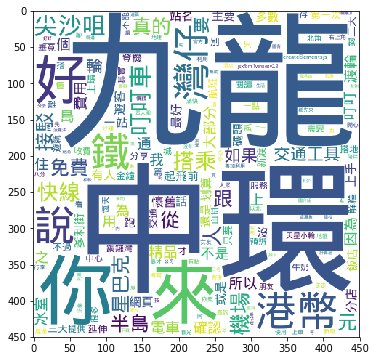

In [19]:
linux_font = r'/Users/leeyishan/Documents/GitHub/in_home/FinalProject/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(15, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=450, width=450)


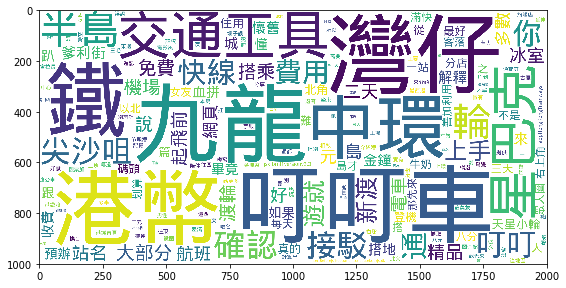

In [20]:
#修正過後
plt.figure(figsize=(20, 15))
ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=1000, width=2000)

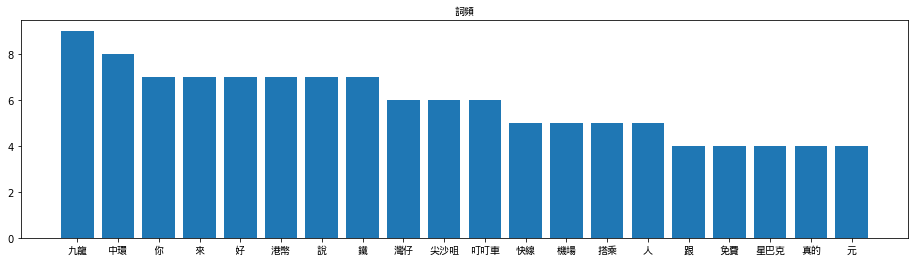

In [21]:
plt.figure(figsize=(35, 4))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

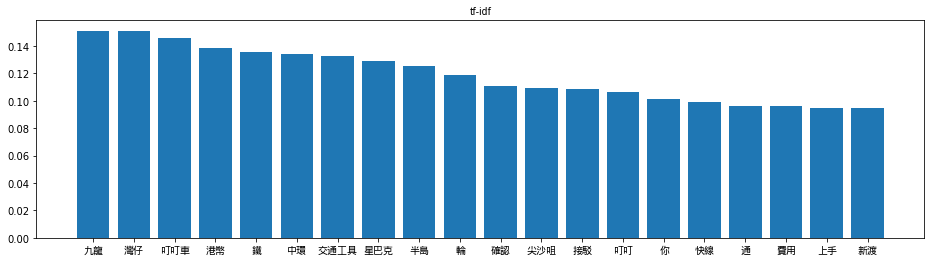

In [22]:
#修正過後
plt.figure(figsize=(35, 4))
ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")